<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Grid-Staggering Elastic 2D</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is a private extension writen by Yajian Gao based on part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* Yajian Gao

This exercise covers the following aspects:

* Solving velocity-stress formulation of 2D wave equation with finite difference method
* Understanding the grid-staggering in connection with finite difference solution to the elastic wave equation
---

### Exercise
First understand the codes below and run the simulation. 

Then, improve the result using (4-point operator) for 1st derivative.

**Message: Once you become familiar with all the codes below you can go to the Cell tab on the toolbar and click Run All.**


# 2. Stability¶
Introduce a new parameter (e.g., eps) and calculate the Courant criterion. Determine numerically the stability limit of the code as accurately as possible by increasing the time step. Print the max value of the pressure field at each time step and observe the evolution of it in the case of stable and unstable simulations. (Hint: The Courant criterion is defined as  eps=(velocity∗dt)/dx  . With this information you can calculate the maximum possible, stable time step. )



In [6]:
# Configuration step (Please run it before the simulation code!)
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
from matplotlib import cm


In [102]:
# Initialization of parameters

# Simple finite difference solver
# Elastic wave equation
# 2-D regular staggered grid

# Basic parameters
nt = 3000                                       # number of time steps
nx = 800                                             # number of grid points in x
nz = 300
                                              # velocity (m/sec) (compression wave)
vp=np.zeros((nx,nz))+6000
vs=np.zeros((nx,nz))+4000
rho0=5000
irx=np.linspace(150,600,15)
irz=np.zeros(18)+(nz-3)

dx=1000                                          #m
dz=1000


isnap = 3                                              # snapshot frequency
isx = 150                                     # source location
isz = 100


#####stable criterion refer to the guide-sofi 3d in Table4
f0 =  np.min(vs)/dx/8
eps = 0.5
dt=eps*dx/np.max(vp)


###In order to ensure stability of the simulation, the temporal spacing must satisfy the Courant-
#Friedrichs-Levy (CFL) stability criterion (Courant et al., 1967).
#####stable criterion refer to the guide-sofi 2d in Table4 and equation 27

dt_stable=dx/(7/6)/np.sqrt(2)/np.max(vp)###from 
dt_stable_new=dx/0.494/np.max(vp)###from
print('f0=',f0)
print('dt=',dt)
print('dt_stable=',dt_stable)
print('dt_stable=',dt_stable_new)
                                                # number of operator either 2 or 4


x = (np.arange(nx)*dx)                                 # initialize space coordinates 
z = (np.arange(nz)*dz)
                                     # calculate time step from stability criterion(s)



# Source time function
t = (np.arange(nt) * dt)                             # initialize time axis
T0 = 1. / f0                                           # period
a = 4. / T0                                            # half-width (so called sigma)
t0 = T0 / dt
tmp = np.zeros(nt)
for it in range(nt):
    t = (it - t0) * dt
    tmp[it] = -2 * a * t * np.exp(-(a * t) ** 2)       # derivative of Gaussian (so called sigma)
src = np.zeros(nt)                                     # source
src[0:len(tmp)] = tmp
lam = np.max(vp) * T0                                          # wavelength


#####source term in space
mxx=1e6/dx/dz
mzz=1e6/dx/dz




f0= 0.5
dt= 0.08333333333333333
dt_stable= 0.10101525445522107
dt_stable= 0.33738191632928477


In [99]:
plt.plot(src)
plt.show()


In [103]:
#####here we could add some heterosgenities in the velocity model
for i in np.arange(100,400):
        vp[i][i-100:i-100+50]=1.05*vp[i][i-100:i-100+50]
        

<IPython.core.display.Javascript object>


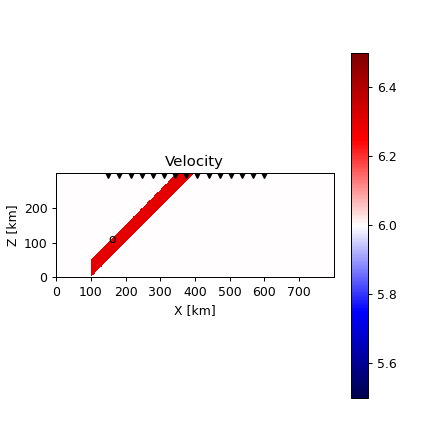

In [104]:
fig = plt.figure(figsize=(5,5))
image = plt.imshow(vp.T/1000, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=5500/1000, vmax=6500/1000)
plt.colorbar()
plt.title('Velocity')  
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.xticks(np.arange(0,1000, step=100))
plt.gca().invert_yaxis()
plt.text(isx, isz, 'o')
for i in range(len(irx)):
    plt.plot(irx[i], irz[i], 'vk')
plt.ion()
plt.show(block=False)

In [105]:
x_coord=np.swapaxes(np.tile(x,(nz,1)),0,1)
print(x_coord)
z_coord=np.tile(z,(nx,1))
x_coord=np.reshape(x_coord,(nx*nz))
print(x_coord)
z_coord=np.reshape(z_coord,(nx*nz))
#print(z_coord)
xyz_matrix=np.zeros((2,nx*nz),dtype=float)
xyz_matrix[0]=x_coord
xyz_matrix[1]=z_coord


Vp=np.reshape(vp,(1,nx*nz))
Vs=np.reshape(vs,(1,nx*nz))
Velocity_matrix=np.zeros((2,nx*nz),dtype=float)
Velocity_matrix[0]=Vp
Velocity_matrix[1]=Vs

Vpv_smooth_all=np.zeros((2,nx*nz),dtype=float)



[[     0      0      0 ...      0      0      0]
 [  1000   1000   1000 ...   1000   1000   1000]
 [  2000   2000   2000 ...   2000   2000   2000]
 ...
 [797000 797000 797000 ... 797000 797000 797000]
 [798000 798000 798000 ... 798000 798000 798000]
 [799000 799000 799000 ... 799000 799000 799000]]
[     0      0      0 ... 799000 799000 799000]


In [34]:
import numba
############################################################################################################
@numba.jit(nopython=True,parallel=True)
def smooth_new(xyz_matrix,iterations,sigmaxy,sigmaz,Velocity_matrix,Vpv_smooth_all):
        '''
        you still need to input a empty matrix input if you want to use this
        '''       
        for i in range(iterations):
            ###L2 difference between point i and the the position vector in x with sigma
            distance=(np.square(xyz_matrix[0][i]-xyz_matrix[0]))/(2*sigmaxy*sigmaxy)+\
                     (np.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaxy*sigmaz)
            distance=np.exp(-distance)
            distance= distance/np.sum(distance)
            Vpv_smooth_all[0][i] = np.dot(distance, Velocity_matrix[0])
            Vpv_smooth_all[1][i] = np.dot(distance, Velocity_matrix[1])
        return Vpv_smooth_all
        


In [18]:
Vpv_smooth_all=smooth_new(xyz_matrix,nx*nz,10000,10000,Velocity_matrix,Vpv_smooth_all)

NameError: name 'smooth_new' is not defined

In [106]:
####this function is intended to use the cupy to accelerate the smoothing process provided you have installed cuda
#### of course you also need a nvidia graphic card
import cupy as cp
import datetime
def smooth_cupy_new(xyz_matrix,iterations,sigmaxy,sigmaz,Velocity_matrix): 
      ##input a numpy array and using asarray move to the gpu device
      Velocity_matrix=cp.asarray(Velocity_matrix)
      xyz_matrix=cp.asarray(xyz_matrix)
      Vpv_smooth_all=cp.zeros((2,nx*nz),dtype=float)  
      #t1 = datetime.datetime.now()       
      for i in range(iterations):  
            distancex=(cp.square(xyz_matrix[0][i]-xyz_matrix[0]))/(2*sigmaxy*sigmaxy)
            #distancey=(cp.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaxy*sigmaxy)
            distancez=(cp.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaz*sigmaz)
            #print(distance)
            distance=distancex+distancez
            distance=cp.exp(-distance)
            distance= cp.divide(distance,cp.sum(distance))
            #print(distance)
            Vpv_smooth_all[0][i] = cp.dot(distance, Velocity_matrix[0])
            Vpv_smooth_all[1][i] = cp.dot(distance, Velocity_matrix[1])
      t2 = datetime.datetime.now() 
      #print(t2-t1)
      # move array from gpu device to the host
      return cp.asnumpy(Vpv_smooth_all)

In [38]:
print(nx*nz)

400000


In [107]:
Vpv_smooth_all_cupy=smooth_cupy_new(xyz_matrix,nx*nz,10000,10000,Velocity_matrix)

In [41]:
vpv=Vpv_smooth_all_cupy[0].reshape(nx,nz)

<IPython.core.display.Javascript object>


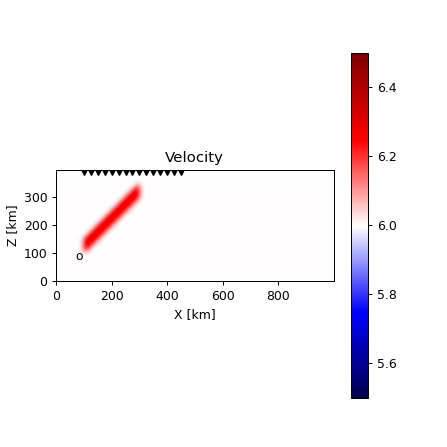

In [42]:
fig = plt.figure(figsize=(5,5))
image = plt.imshow(vpv.T/1000, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=5500/1000, vmax=6500/1000)
plt.colorbar()
plt.title('Velocity')  
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.gca().invert_yaxis()
plt.text(isx, isz, 'o')
for i in range(len(irx)):
    plt.plot(irx[i], irz[i], 'vk')
plt.ion()
plt.show(block=False)

In [108]:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
    for i in range(ni1,ni2):
        for j in range(nk1, nk2):
            dsxx =  9/8*(sxx[i+1][j]-sxx[i][j])/(dx)-1/24*(sxx[i+2][j]-sxx[i-1][j])/(dx)
            dszx = 9/8*(szx[i][j]-szx[i-1][j])/(dz)-1/24*(szx[i+1][j]-szx[i-2][j])/(dx)
            dszz = 9/8*(szz[i][j+1]-szz[i][j])/(dz)-1/24*(szz[i][j+2]-szz[i][j-1])/(dx)
            dsxz = 9/8*(sxz[i][j]-sxz[i][j-1])/(dx)-1/24*(sxz[i][j+1]-sxz[i][j-2])/(dx)
            vx_new=(dsxx+dsxz)
            vz_new=(dszz+dszx)
            vx[i,j]=vx[i][j]+dt*(vx_new/rho[i,j]) 
            vz[i,j]=vz[i][j]+dt*(vz_new/rho[i,j])
    return vx,vz



<IPython.core.display.Javascript object>


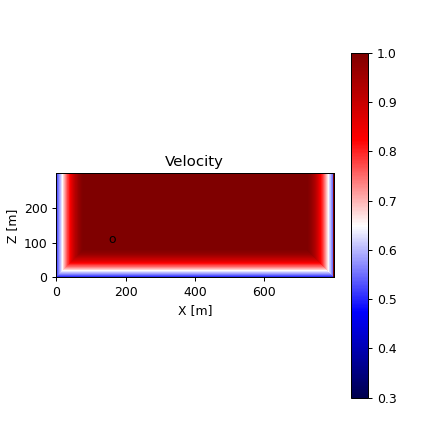

In [120]:

def generate_damp_guassian(nx,nz,ni1,ni2,nk1,nk2,absorb_thickness_n):
    #absorbpoint_x=np.arange(ni1,ni1+absorb_thickness_n-1)
    damp=np.ones((nx,nz))
    ####left boundary
    for i in range(ni1,ni2):
        for j in range(0,absorb_thickness_n):
            #print()
            damp[i,j]=(np.exp(-(0.01*(ni1+absorb_thickness_n-j))**2))
            
            
    #lower boundary
    for i in range(nk1,absorb_thickness_n):
        for j in range(0,nk2):
            #print()
            damp[i,j]=(np.exp(-(0.01*(nk1+absorb_thickness_n-i))**2))
            #print(j,damp[i,j])   
    # right boundary       
    for i in range(ni2-absorb_thickness_n,ni2):
        for j in range(0,nz):
            #print()
            damp[i,j]=(np.exp(-(0.01*(ni2-absorb_thickness_n-i))**2))
            #print(j,damp[i,j])    
    # left lower corner 
    for j in range(0,nk1+absorb_thickness_n):
        damp[j:ni1+absorb_thickness_n,j]=(np.exp(-(0.01*(nk1+absorb_thickness_n-j))**2))
                
    # right lower corner
    for j in range(0,nk1+absorb_thickness_n):
        damp[ni2-absorb_thickness_n:ni2-j,j]=(np.exp(-(0.01*(nk1+absorb_thickness_n-j))**2))   
    
            
    return damp


stencil=2
ni1=stencil+1
ni2=nx-stencil
nk1=stencil+1
nk2=nz-stencil
damp=generate_damp_guassian(nx,nz,ni1,ni2,nk1,nk2,80)
fig = plt.figure(figsize=(5,5))
image = plt.imshow(damp.T, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=0.3, vmax=1)
plt.colorbar()
plt.title('Velocity')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.gca().invert_yaxis()
plt.text(isx, isz, 'o')
plt.ion()
plt.show(block=False)    
    
    
    
    
    

In [121]:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_s(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
    for i in range (ni1, ni2):
        for j in range(nk1, nk2-1):
            ezx=9/8*(vz[i+1,j]-vz[i,j])/dx-1/24*(vz[i+2][j]-vz[i-1][j])/dx
            exz=9/8*(vx[i,j+1]-vx[i,j])/dz-1/24*(vx[i][j+2]-vx[i][j-1])/dz
            exx=9/8*(vx[i,j]-vx[i-1,j])/dx-1/24*(vx[i+1,j]-vx[i-2,j])/dx
            ezz=9/8*(vz[i,j]-vz[i,j-1])/dz-1/24*(vz[i,j+1]-vz[i,j-2])/dz
            #hTxx=(lamd[i,j]+2*mu[i,j])*exx+lamd[i,j]*ezz
            #hTzz=(lamd[i,j]+2*mu[i,j])*ezz+lamd[i,j]*exx
            #hTxz=(mu[i,j])*ezx+(mu[i,j])*exz
            sxx[i,j]=sxx[i,j]+((lamd[i,j]+2*mu[i,j])*exx+lamd[i,j]*ezz)*dt
            sxz[i,j]=sxz[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
            szz[i,j]=szz[i,j]+((lamd[i,j]+2*mu[i,j])*ezz+lamd[i,j]*exx)*dt
            szx[i,j]=szx[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
        ### free surface
        sxx[:,nk2]=sxx[:,nk2]+((lamd[:,nk2]+2*mu[:,nk2])*exx-(lamd[:,nk2]**2/(lamd[:,nk2]+2*mu[:,nk2])*exx))*dt
            #sxz[i,j]=sxz[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
        szz[:,nk2]=szz[:,nk2]
            #szx[i,j]=szx[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt                
    return sxx,sxz,szz,szx

In [122]:

import datetime

######here you could input a heterogenity vp and vs

def assemble_psv(dx,dz,rho0,vp,vs,dt,nt,nx,nz,irx,irz,isx,isz,src,damp):
    t1 = datetime.datetime.now() 
    rho=np.zeros((nx,nz))+rho0
    mu = np.zeros((nx,nz))+rho*vs**2
    lamd=np.zeros((nx,nz))+rho*vp**2-2*mu
    ##### initial the cycle
    vx = np.zeros((nx, nz))
    vz = np.zeros((nx, nz))
    sxx = np.zeros((nx, nz)) 
    sxz = np.zeros((nx, nz))
    szz = np.zeros((nx, nz))
    szx=np.zeros((nx, nz))
    seis = np.zeros((len(irx), nt))
    print(np.shape(seis))
    ir = np.arange(len(irx))
    v = max([np.abs(src.min()), np.abs(src.max())])
    stencil=2
    ni1=stencil+1
    ni2=nx-stencil
    nk1=stencil+1
    nk2=nz-stencil
    fig = plt.figure(figsize=(8,8))
    #plt.plot(x[isx-200:isx+202]/1000,100*np.sqrt(2*np.abs((x[isx-200:isx+202]/1000-isx)/100)\
                                               #  -((x[isx-200:isx+202]/1000-isx)/100)**2)+isz,'r')
    #plt.plot(x[isx-200:isx+202]/1000,100*(-2.14)*(np.sqrt(np.sqrt(2)-\
                                                     #     np.sqrt(np.abs((x[isx-200:isx+202]/1000-isx)\
                                                    #                     /100))))+isz,'r')
    #extent = [np.min(),np.max(X),np.min(X),np.max(Y)]
    image = plt.imshow(vx.T, animated=True, cmap=cm.seismic, interpolation='bicubic', vmin=-1e-2, vmax=1e-2)
    #image = plt.imshow(vp.T/100000, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=-0.001, vmax=0.001)
    plt.colorbar()
    plt.title('Wavefield vy')
    plt.xlabel('X [km]')
    plt.ylabel('Y [km]')
    plt.gca().invert_yaxis()
    plt.text(isx, isz, 'o')
    plt.ion()
    plt.show(block=False)
    
    #### free surface by image
    #plt.text(isx, isz, 'o')
    for i in range(len(irx)):
        plt.plot(irx[i], irz[i], 'vk')
    #fig.canvas.draw()
      
    for it in np.arange (nt):
        szz[:,nk2]=0
        #for n in range(0,stencil-1):
        #    szz[:,nk2+1+n]=-szz[:,nk2-1-n]
         #   sxz[:,nk2+n]=-sxz[:,nk2-n-1]
        vx, vz = update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu)
        vx=vx*damp
        vz=vz*damp
        vz[:,nk2  :nz]  = 0.0;
        vx[:,nk2+1:nz]  = 0.0;
        vz[isx,isz]=vz[isx,isz]+src[it] 
        vx[isx,isz]=vx[isx,isz]
        ###for the receivers
        for k in np.arange(len(irx)):
            print(vz[int(irx[k]),int(irz[k])])
            seis[k,it]=seis[k,it]+vz[int(irx[k]),int(irz[k])]
        sxx,sxz,szz,szx = update_s(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu)
        #sxx=sxx*damp
        #sxz=sxz*damp
        #szz=szz*damp
        #szx=szx*damp
        if (it % isnap) == 0:
            #print(np.shape(vz))
            image.set_data(vz.T)
            plt.plot
            fig.canvas.draw()
    t2 = datetime.datetime.now()   
    print(t2-t1)
    plt.close()
    return vx, vz,seis








(15, 3000)


<IPython.core.display.Javascript object>


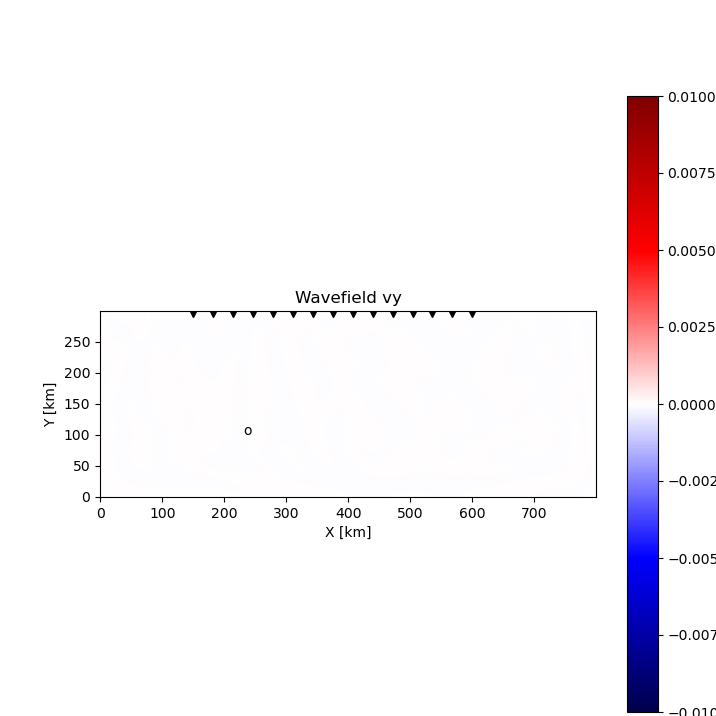

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


9.442191863923499e-244
3.231423068554672e-185
4.078835443219375e-142
6.555650824718361e-142
1.4532679867982579e-184
1.6561762343529404e-242
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.991973564073435e-240
-1.0641735212657588e-182
-2.456933877555887e-140
-3.973919789217076e-140
-4.867465193437203e-182
-5.413869069593039e-239
-1.296538817e-315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.46635767992702e-237
3.1014949524666485e-180
1.355450500905897e-138
2.2065579750975865e-138
1.4429799933144035e-179
1.393884552957202e-235
2.07439814479364e-309
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.4961204203907894e-233
-8.04168651084067e-178
-6.861797025649749e-137
-1.1244500205916228e-136
-3.806259879511458e-177
-2.882084171224963e-232
-6.428617201767626e-304
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.447516247538514e-230
1.8638783392709626e-175
3.193106931681446e-135
5.268122717781327e-135
8.976297603616368e-175
4.865700570540778e-229
8.076963766336592e-299
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-3.3158007763611604e-227
-3.878664733195

9.727675177444299e-145
2.789975081058949e-111
9.610296613442365e-98
2.398020827689876e-96
3.4277860629027063e-110
7.783568264053361e-143
3.699341533508675e-185
-2.2644791552799014e-238
-1.023839634183855e-299
0.0
0.0
0.0
0.0
0.0
0.0
-4.12936927554366e-143
-3.764848332435072e-110
6.218295139139454e-96
7.589588134183037e-96
-4.835642763604489e-109
-3.458427616583706e-141
-4.470490944158993e-183
8.294587186214645e-236
1.469715393239094e-296
0.0
0.0
0.0
0.0
0.0
0.0
1.6585022381710708e-141
4.743811549372394e-109
-3.3073425100970575e-95
-7.397445713930949e-95
6.390228905826034e-108
1.4550733528482706e-139
5.070493628819868e-181
-2.791400668666939e-233
-1.8536999106433857e-293
0.0
0.0
0.0
0.0
0.0
0.0
-6.305966672427641e-140
-5.567497878002368e-108
7.482652961627786e-95
2.6200399472317284e-94
-7.895952315053528e-107
-5.80047071322333e-138
-5.404946139466599e-179
8.653434683858459e-231
2.0666443885156186e-290
0.0
0.0
0.0
0.0
0.0
0.0
2.270978028260462e-138
6.066631700816459e-107
9.79397669017110

-9.884815739882045e-102
-3.197344048894035e-84
2.1119739262056433e-78
4.355481137868762e-78
-1.7273715055760146e-82
1.993752245930278e-98
9.830220959116973e-125
-7.236910276419175e-164
-2.0724846109622092e-210
-7.372719161542178e-263
-1.3459e-319
0.0
0.0
0.0
0.0
8.79662394735184e-101
-3.0528903894636895e-83
4.141236550283699e-79
-7.350042618783402e-78
5.2532106570456754e-82
-5.1985086104347075e-98
-1.9818870794744506e-123
3.2770220865430666e-162
1.9298106709594746e-208
1.4640563438318052e-260
6.5417147e-317
0.0
0.0
0.0
0.0
-4.851004267952475e-100
1.457608245064967e-82
-1.7587931836810368e-77
-2.376854104947591e-77
1.1355199581370108e-81
-1.4011596499956344e-97
3.824410281141896e-122
-1.4220794946482124e-160
-1.7128829615436563e-206
-2.7432278962764006e-258
-2.948076343e-314
0.0
0.0
0.0
0.0
1.443263948923007e-99
8.083298489823763e-83
-5.714678849523792e-79
3.908066219074771e-77
-1.169320996241405e-80
2.997403343447039e-96
-7.062262931928668e-121
5.916432461117052e-159
1.4502637539863673

1.01055611451315e-80
-5.683931445272121e-68
-1.7575125343257793e-63
-2.7226083023701825e-63
7.824833270716157e-67
-5.102725097773496e-78
-2.2744863358349868e-95
-8.249094542122546e-122
-2.059208730956523e-159
-2.817429890084279e-203
-1.2813743075672892e-250
-1.4762606229711126e-301
0.0
0.0
0.0
-3.762536222088292e-80
2.0061725116264244e-67
-1.8937745896165445e-63
3.949243830173681e-64
4.9836476126456776e-67
3.76901818068098e-77
-4.384332854291345e-95
1.1194824086230493e-120
5.6580177306126276e-158
1.4078889746817342e-201
1.1682584464125558e-248
2.6414759361531727e-299
0.0
0.0
0.0
-7.304843010441373e-80
5.2500124483902084e-67
1.0234962289148153e-62
2.5358757445055134e-62
-5.133609654922596e-66
-3.271117165012915e-77
1.0147304650991205e-93
-1.4553255056764402e-119
-1.4994762477745722e-156
-6.776740912046624e-200
-1.02130469881431e-246
-4.498825736502925e-297
0.0
0.0
0.0
8.741751459430287e-79
-1.1774501578521855e-66
4.605645535331721e-62
6.907619017639408e-62
-7.561975214643885e-66
-5.3762

-1.9595408204123932e-63
8.333821995583755e-55
-2.3962358657482016e-50
-6.174216262170395e-50
8.560400685824403e-54
-2.088943572416703e-61
1.915578654264867e-75
3.2418983327670894e-96
-2.865268135308365e-123
-5.513515516385569e-159
-5.249024414583251e-199
-4.047991384550565e-242
-2.570165935382086e-289
0.0
0.0
2.6915965647015443e-63
4.149763263606523e-54
-1.0141279235369483e-49
-1.5850872400059708e-49
-1.1892463807539077e-53
-2.0758375598074822e-60
1.820370498513496e-74
-1.2635224269953896e-95
2.3617449847492053e-122
9.723895638831382e-158
1.606416014093743e-197
2.15303105416761e-240
2.387956287220162e-287
0.0
0.0
2.0227025042158747e-62
2.713883201769858e-54
-1.428062933995272e-49
-6.132140939862722e-50
-8.425460718827997e-53
3.162693867682716e-60
-8.965979393356907e-74
4.366737530778608e-96
-1.8265022006523915e-121
-1.6568081805275162e-156
-4.7585898225183e-196
-1.1070217175863387e-238
-2.1376413070180593e-285
0.0
0.0
-3.484699645663194e-62
-2.326586477975324e-53
2.423211145761451e-49


9.844525122377995e-51
-1.2013717263764796e-43
-2.738977127355767e-40
-1.3393851113932278e-39
4.672877804174539e-43
1.3907431738437042e-48
-1.7232820643946626e-60
1.2928785152961848e-80
-2.0301832206486302e-103
2.416187564825952e-132
7.498585647263315e-164
1.9966646145682965e-200
2.1086685210938356e-241
2.483681519430415e-286
0.0
-1.8125449538248365e-50
-6.562323817984643e-44
-2.485000621733598e-39
-4.816376871196183e-39
2.1165187741298708e-42
2.6282649070304844e-48
5.016008875412528e-59
-8.731900123062665e-78
2.236860543444128e-102
2.3054084250895487e-131
-9.366420165852171e-163
-4.5287480950056135e-199
-8.045123416800179e-240
-1.5572361602648538e-284
0.0
-8.491299796199944e-50
5.258961620754654e-43
-5.882434847829035e-39
-7.090657907122608e-39
2.6065095240625194e-42
-6.933876769760301e-48
-3.0342803172355446e-59
2.8026492682289822e-77
-8.866947273841805e-102
-3.1445608230128987e-130
1.1268813472976824e-161
9.962529512259342e-198
2.9795027028198678e-238
9.46276076535506e-283
0.0
5.1282

2.3374624786792274e-41
-5.8664209126763066e-36
-2.7848269290005034e-31
-3.993419633791498e-31
-3.7925422220660694e-34
1.8065996381958825e-39
8.644990958031846e-48
-1.861020729970988e-64
9.451679321669974e-89
2.6891604269526233e-114
-3.0085111439219904e-143
9.497726973933034e-172
6.231601430668578e-207
9.230766918179357e-247
-9.061149795577119e-292
-4.129476195884605e-41
-1.1843149098240104e-34
-3.7562832938689044e-31
-1.9566702111063836e-31
-2.854858779403622e-34
4.39631589948687e-39
1.1794936238935311e-48
-2.2416589172152085e-64
9.5213708367031e-87
-6.226501232779138e-114
-1.4239336800669032e-142
-9.438203878238571e-171
-1.1861583071177087e-205
-2.883389982753196e-245
4.54540433945213e-290
-1.925627361193286e-40
-2.874462198827306e-34
1.7366783705954158e-31
1.266344306460949e-30
1.0538294125599106e-33
-1.9460203590364228e-39
-6.873917970808996e-47
2.602477487578066e-63
-3.275130028618247e-86
-2.772657442723877e-113
2.1653523641889943e-141
8.946142619023162e-170
2.1924881420759828e-204

-7.018345141285131e-33
-3.886961093062358e-27
-1.4012015881263197e-23
-2.3985676660648735e-23
1.956879837369567e-26
1.5615634069184136e-31
-5.720125810807038e-38
3.928597408287637e-52
3.089761254870923e-73
1.0827882678011704e-98
-9.89503479179491e-126
-5.216239085060635e-152
4.144028068605534e-180
3.762604021281998e-214
-3.412428474503309e-254
-1.1359418461465084e-32
-1.2921349535702569e-27
-2.738965324725337e-23
-3.10920368646231e-23
5.526302788310261e-26
-3.4303870675803276e-31
1.4622290758780758e-37
7.40646606208635e-52
5.1934038347027416e-74
6.18898468465054e-99
-2.4476320853837962e-126
2.3274620734477426e-151
-3.260489918037524e-179
-6.085897169291066e-213
9.053604912313875e-253
7.369396154813412e-33
1.282437548349199e-26
-2.561503072526191e-23
3.697921228998161e-24
7.273868098231519e-26
-1.4006974495137763e-30
4.5000510767155044e-37
-3.776819300072082e-51
-4.031070379992504e-72
-2.0567453482481146e-97
2.7158312159643595e-124
-2.160959207997266e-151
2.3945653212573313e-178
9.56317

4.3775294797972186e-26
-8.594581624035676e-20
1.1222537422929635e-16
1.0886015520512636e-16
2.4040789536855203e-19
4.100283959236838e-24
-9.290462326315311e-30
1.649327600051222e-41
-1.2917381386619672e-60
1.616139774639304e-84
2.347805996777617e-111
1.4872376626638106e-134
3.2295459703850807e-161
2.5154644768741504e-189
-3.965680840108807e-223
-2.1392276032848974e-25
-7.68493901874765e-20
8.629040987618508e-17
-4.287404630750549e-17
8.777312968366752e-19
1.0291608433811159e-23
2.831750891119046e-29
7.131431954496585e-41
7.50164552045683e-61
-3.473607588356641e-84
-8.819853147626805e-109
-7.50469180110902e-134
-1.728646554302527e-160
-1.261091232957733e-188
5.581760003088011e-222
-6.752999283281128e-25
1.0254965384778515e-19
-1.3240515086169895e-16
-4.990120711165724e-16
1.6319130269702636e-18
9.886360465375051e-24
7.873855200545122e-29
-7.946078908366315e-41
1.2203290396058847e-59
-1.5938103439023262e-83
2.6408470710592266e-108
7.023566307559188e-135
3.345705643417997e-160
4.566585014

-9.16606124297434e-19
6.56258200367217e-14
-1.2255648096209896e-10
-1.8810386539221004e-10
-1.3430454124575632e-12
3.3597369399314664e-17
1.6840903459867372e-22
-1.2166312329252139e-32
-1.9424614478400334e-49
-8.083200924187609e-72
-4.005212798611842e-95
9.809695828905041e-120
-7.893984082516338e-144
-8.41253614947364e-171
1.6952970962835776e-200
-2.3927580548068515e-18
-2.404962412312391e-13
-2.0333113047051442e-10
-2.328523062994348e-10
-2.1158958514283304e-12
4.6897428335060263e-17
7.39328029874536e-23
-1.3818111045795423e-31
1.6735835355509102e-49
1.8469491256732917e-71
-4.6379751796926555e-94
9.283126606276995e-118
2.682602956814058e-143
4.694204262636682e-170
-2.6709727107489764e-199
-3.145427422086024e-18
-8.812013377993932e-13
-2.2561910460762022e-10
-1.268372532034353e-10
-1.7800703052381506e-12
4.574386015849664e-18
-4.273678135130651e-22
-7.026173639525753e-32
1.4963993828830256e-48
7.338967004953835e-71
1.2813428882137728e-93
-2.905261607024501e-117
6.196349890228631e-143
-

-1.0696264201328654e-13
-7.89815406731841e-08
-7.3963116367436e-06
-9.530869971403289e-06
4.0131918527937265e-08
3.247657565159609e-11
3.7749344461387657e-17
3.318673957335031e-25
9.39947089998457e-40
-1.5264014966046036e-60
1.599258733890944e-81
4.5949744659868086e-104
3.5443336271104794e-128
1.5273618888168731e-153
-1.0177682509929499e-181
-4.136769947665687e-12
-8.867456578385945e-08
-9.868066626079192e-06
-1.0142370937728888e-05
2.6630727801322026e-07
1.022436485333255e-10
-3.6218736444212556e-17
-6.073407193877668e-24
-2.0910131829410818e-39
2.5010924784316956e-60
1.7126529351446933e-80
5.760507087911672e-103
-4.092401166138433e-127
-2.0688026040487702e-153
8.586404045154525e-181
-1.0644002315098615e-11
-4.252930408667728e-08
-9.889963681427173e-06
-6.249397796023558e-06
6.040166499765364e-07
1.7358410338882238e-10
-2.335801596461666e-16
-9.230111450798736e-24
-7.094348093037967e-39
1.2044741663889236e-59
-2.720859652963765e-80
-1.5861551092459989e-102
5.1691323909091415e-127
-2.6

-6.502489917262528e-09
-0.0004220951147850211
0.0012645406572188047
0.0013961821043708279
-0.001049478785258943
-1.147715519716031e-08
-1.8563848335715221e-10
-2.9678753020726875e-18
-4.5111418808103745e-32
6.444900890078561e-50
1.0832546639260572e-68
-4.503058179130758e-90
2.8001724545465204e-114
-1.291305836274044e-137
2.08491489087417e-164
4.6692750684679214e-07
-0.0006835621902917357
0.001419740165158018
0.0013863890090441756
-0.0011223668606866804
-3.899308870223402e-06
-1.9020742029264957e-10
4.3675779275898995e-18
-8.355333751788598e-31
3.4757555842936804e-49
3.674225004767735e-68
-2.4031986876435948e-89
-2.703752697102656e-112
5.482847790819959e-137
-3.7134957546991896e-164
1.1919119194256418e-06
-0.0009294691644087707
0.001385872601710492
0.0012164570316302934
-0.0010435187986347272
-9.592567340734223e-06
7.127426223157991e-11
1.519619463354422e-17
-8.031234588505921e-31
-1.9186787694966963e-49
-9.80209050086466e-68
6.962722027052162e-89
3.892060494018075e-112
8.69038480646599

-0.0010140012973681098
-0.00015240088251312358
-4.923789999755622e-05
-3.5847898229624175e-05
-0.00010823826439612945
0.0006248939593697979
1.3572726761115006e-06
-1.0607084633965811e-12
4.641237353465375e-24
1.4664152337929296e-39
-3.450785023600195e-57
-3.649770584884769e-77
1.952640903260172e-99
-6.062692773273525e-123
-1.4885285314565726e-148
-0.0008783913351645143
-0.00015061811098349834
-3.518520962010223e-05
-2.4996606657528408e-05
-9.096242558380835e-05
0.0007853444938539617
-5.202665700461813e-06
2.6290626188864365e-13
6.85432833712968e-24
-1.2966960894168653e-39
4.220179095560826e-57
-1.9455564108752363e-77
1.2465073433560874e-98
4.24766321101875e-122
7.018631985041314e-148
-0.0006057223633636956
-0.0001346269780162491
-2.444402437727683e-05
-2.065670301685732e-05
-8.015645254047163e-05
0.0008408427968276744
-1.4605028372668925e-05
3.652913098478613e-12
-5.6906977958483324e-24
-1.0392565197883105e-38
3.0480175044638506e-56
3.685084028733078e-76
-3.299589643758455e-98
2.404869

-9.364735819901549e-05
-9.896727787236036e-06
-3.0849204075830923e-06
-4.172149095615719e-06
-7.801721646975072e-06
-3.563926515596978e-05
0.00041969575141639545
1.0941305725131854e-07
-1.3177188075415752e-19
1.162119597420764e-30
8.70206695867156e-47
-1.1914407645877994e-66
2.373283592690176e-86
-1.2260977672108877e-109
-4.881794129714683e-134
-8.475703792130516e-05
-7.387154748637401e-06
-4.152830977799508e-06
-5.689414827980387e-06
-8.71024889697237e-06
-3.2259879970731276e-05
0.00047333583157041633
2.361383541387911e-07
-6.707873677226831e-18
-1.0896771291837403e-31
8.772508433547394e-47
-4.424329586168342e-65
-8.774665103426603e-87
-2.6259310999688583e-108
5.597858987526825e-133
-7.38225387709527e-05
-6.699848308602706e-06
-5.7562186191736815e-06
-6.296484800142094e-06
-8.477794334144681e-06
-2.8406410124538306e-05
0.00048204069413660826
2.6728631731276283e-07
-9.297465834730799e-18
-5.755257104983681e-30
-4.781872426013795e-46
-1.5921749277279225e-65
-2.4763249470775152e-85
3.525

-6.0733705312169015e-06
-3.1418233142579815e-06
-1.8612378302886763e-06
-8.761783218299231e-07
-1.5900402132623101e-06
-3.983091653769343e-06
-1.8142877469630515e-05
-4.6310475967151816e-05
-6.152499994396741e-14
-4.791865128931527e-24
1.630498081273937e-37
-5.596458324378032e-56
9.706678301983361e-75
-5.268350472220535e-96
-6.119725431195265e-120
-5.897180500229114e-06
-3.1138719474792325e-06
-7.413746015457021e-07
-1.1709174735502574e-07
-1.6093972497841256e-06
-3.7502191693465674e-06
-1.626761692709403e-05
-0.00013613719113160738
7.009335662432428e-13
9.180281169854518e-23
-4.233434188925694e-38
1.6273920599743022e-54
3.360197871705936e-74
1.3872399994096785e-96
-2.8910625174334195e-119
-6.144774293849429e-06
-2.578922278482701e-06
9.735231473536535e-08
1.6049744931512458e-07
-2.0241298898205934e-06
-3.6381075253787694e-06
-1.4564513738285867e-05
-0.000223178437727178
1.813377085833415e-12
1.5207458158180799e-22
-9.205656965659373e-37
1.914618372628541e-54
-6.7692175628493146e-74
5.

-1.9612796404154248e-06
1.4507561699415126e-06
1.8550694513551176e-06
3.9464116176453156e-06
1.743769434042036e-06
4.2770081707634853e-07
-1.1097926598914515e-06
5.968503597927511e-05
1.1693969105349019e-07
6.667795923122431e-17
1.8731624585605345e-29
2.3935030383820286e-45
-8.280964866353152e-64
-3.619984883377552e-84
-6.285911701998619e-107
-1.7223031101510972e-06
1.240479124603659e-06
1.8839788060974237e-06
4.0578167750513445e-06
1.751473483285259e-06
4.091586303507811e-07
1.1939146212767495e-06
3.594058839249252e-05
1.118521793205922e-07
-5.456960152071832e-17
5.322373522571571e-29
4.497592190273827e-45
-1.7218914490789022e-63
-7.291754470538294e-84
2.2586234879718556e-106
-1.5966435180501407e-06
1.2884464919296386e-06
1.9456357123481983e-06
3.836845759204107e-06
1.6185493918063885e-06
4.78200659505511e-07
2.6320095195873317e-06
1.6549581165403318e-05
-2.4531028310849464e-08
-2.720506953755347e-16
-4.239994007793668e-30
-8.293582787726409e-45
4.5184768631144553e-63
2.92971803178275

1.6770616459724363e-06
1.5523258473943804e-06
1.4975776559689352e-06
1.6177624966965922e-06
2.1195202564565164e-06
1.6307007132564543e-06
1.9291313524045684e-07
5.51577753665288e-06
5.3431608444818844e-05
1.0143343083259584e-11
-2.1319241155503153e-22
4.995691558984101e-37
-3.6458944886675857e-54
4.140583567988709e-73
-8.32443080471335e-95
1.7350191340939148e-06
1.2473892982347732e-06
1.4534075208787625e-06
1.6663649329479661e-06
2.118406340118189e-06
1.1275965184443512e-06
2.4563910244932556e-07
3.5375703270642647e-06
0.00011288868638595841
-2.0415704772333485e-12
-4.6209857697104165e-22
2.4242021576832127e-36
1.3762998880413338e-53
5.4150627167239156e-74
1.4086566632284348e-94
1.7292077099281186e-06
1.1782139223566963e-06
1.5085175490981231e-06
1.6147523341936776e-06
2.0039072681078668e-06
7.491493072362709e-07
1.983236097261261e-07
1.2670068649191716e-06
0.0001486835192785552
-3.077505222966168e-11
1.165565156380211e-23
1.0245212064406552e-36
3.765454069509176e-53
-3.062795064142753

9.25886566452027e-07
-3.9199166172190087e-07
-1.434233721239304e-06
-1.5752255867353983e-06
-6.338723924050841e-07
1.0018495834902426e-06
2.6595883366967354e-06
2.157708096280788e-06
7.438877237386375e-07
9.159255605296505e-07
4.959391340513839e-16
2.8853627769682614e-28
-7.595614333948926e-46
8.003378729169406e-62
2.70783967389713e-82
8.224122646736545e-07
-4.802776246929184e-07
-1.6230160656962938e-06
-1.7416252715116497e-06
-7.209285259810683e-07
8.264503000749396e-07
2.7181337775785175e-06
1.2602414974277236e-06
-4.0168497438086245e-05
1.6879314094935865e-06
-1.9789889401173924e-16
2.3825850372771e-28
-1.5363920090422348e-43
6.916567142331763e-62
4.161216266386391e-82
7.755833279569927e-07
-6.443538416873233e-07
-1.8105212461516607e-06
-1.8380351836422037e-06
-8.020562226203991e-07
6.575666587259489e-07
2.7103138859795864e-06
1.7559428914533137e-07
-6.928821253103279e-05
1.5615584182414126e-06
-1.671699211355785e-15
-6.923994782446796e-28
-2.0766097516563677e-43
-4.167697184595066e

-1.245641527291606e-06
-2.7318022245725255e-06
-3.070208412964572e-06
-3.097653997198001e-06
-1.2741215688379406e-06
-1.6680305053565862e-06
-2.5795888949243733e-07
1.4531354743093405e-06
-7.5836548292757315e-06
-1.1116715892919069e-05
3.11131054254803e-11
-3.424058598875885e-23
4.0657308541960114e-36
9.466885304001889e-53
-8.432606811441855e-73
-1.3452337704444216e-06
-2.8047396924187028e-06
-3.0803712692296574e-06
-3.0473334258037526e-06
-6.508205764929502e-07
-1.7554836062878866e-06
-2.7416470421833527e-07
1.1490891279416963e-06
-4.912700259284452e-06
-8.008039149293394e-05
1.4307472299822e-10
-8.2201701443557275e-22
8.332012309387375e-36
8.353304823976863e-53
-1.1061851057905083e-71
-1.4885389310770951e-06
-2.8801072471157368e-06
-3.032214899540192e-06
-2.9494925701545698e-06
-2.5144139125777346e-07
-1.8075882496852e-06
-9.336818380477754e-08
8.579822549003871e-07
-2.369476057353995e-06
-0.000153546315488812
2.0571849367476818e-10
-1.2475896689578454e-21
-3.523320652635565e-36
-3.7

-3.1328099785054443e-06
3.968452236525545e-06
4.5583631923699575e-06
4.629582686030539e-06
3.89779279509657e-06
-2.5148578054348006e-06
-3.8548048484640693e-07
1.146069443001569e-06
-9.871994187085654e-07
4.310673330947882e-05
1.1027221338526646e-06
1.770503523186736e-17
2.9497956986953562e-30
-4.738989828432146e-45
-4.945332153612168e-63
-3.17679588755704e-06
4.671968953919343e-06
9.246899566418567e-06
9.334413563484232e-06
4.679520458546847e-06
-2.4853755264844003e-06
-8.346116806166468e-07
1.5160825555056936e-06
-3.3284067142196075e-06
-5.651741174241173e-06
1.3171353799761398e-06
-2.1748418456016407e-16
-5.331510494045561e-29
2.1906488886824891e-44
-1.9768726277110668e-62
-3.206755871942302e-06
4.579098872084371e-06
1.4478369983546051e-05
1.4539745423835618e-05
4.6226842704646955e-06
-2.458218644920445e-06
-1.301491160718698e-06
1.8717399190103781e-06
-5.62556819189622e-06
-4.379788241255738e-05
6.220013095238599e-07
-4.625213252054805e-16
-1.0073072828916738e-28
5.478012946586154e

-3.7104573768491923e-06
0.0002080025918500013
2.0897236975350923e-06
2.2502056523069603e-06
0.0002080874640996808
-2.6650938309508664e-06
-9.84832829335943e-07
-2.5661118017688766e-06
9.558476142087037e-06
-1.4781880757782194e-05
-3.1004304934977676e-05
-4.1253828253119965e-12
-2.6497759958164754e-24
2.4667691289003526e-37
2.042260113582224e-54
-2.3935914234046346e-06
0.00021554415847176313
7.203768450360557e-06
7.333476505575919e-06
0.0002155720380249345
-1.3530888081273815e-06
-9.979331577538472e-07
-3.182193390586747e-06
1.1144958226407984e-05
-1.2918035058593917e-05
-0.0001063424274754391
3.0320566367171976e-11
-4.3608672054439684e-23
-3.423398186890726e-38
-1.7885013217408798e-54
-2.571448884696402e-07
0.0002055163531927669
1.001475445779446e-05
1.0076918248520169e-05
0.0002055230064553324
7.531254026944555e-07
-1.0436974596961534e-06
-3.7549770263516507e-06
1.25233838608999e-05
-1.0925336655283511e-05
-0.0001778126993916743
7.294180226455507e-11
-6.807721803587412e-23
-9.81573429

-6.401612950693297e-05
-6.0692436775897454e-05
-7.546476604913915e-06
-8.99045127109175e-06
-6.057480447534488e-05
-6.417075642944182e-05
-1.5305619367349087e-06
3.0319958031852182e-06
-1.1974594124223374e-05
4.448208940859937e-08
0.00013529089316874804
-3.3787712022504076e-09
1.380402115794732e-17
5.624862910816808e-31
-1.3104169679648628e-46
5.298520185661868e-05
-7.041640155173492e-05
-5.833501287067016e-06
-7.383749471492754e-06
-7.028998667984078e-05
5.329669117669204e-05
-1.2096542498053845e-06
3.3784763611420263e-06
-1.1180255440763901e-05
7.71877318407664e-07
0.00012829448663236734
3.299335079027534e-07
2.890452026279598e-18
-6.805890032249473e-31
-2.784744645220258e-47
0.00017990982047440108
-6.617110129073243e-05
-3.0766098925221477e-06
-4.637218537481273e-06
-6.601931034631948e-05
0.00018066096073966628
-8.834452778398673e-07
3.605884419855133e-06
-9.998106126840507e-06
1.4857355193318732e-06
0.00011406588925863384
6.829349480391018e-07
-3.5250585647828734e-17
-3.07477013527

0.00010810147798369143
-8.357308371676062e-06
-4.088115818693055e-06
-4.023234927395199e-06
-7.727923946123971e-06
0.00010724635052605428
2.594675959293813e-05
-7.498862404687226e-06
9.18791545747134e-07
-2.996529941750629e-07
-3.4492603945998614e-06
7.12629280772249e-05
-2.6292922825581796e-12
4.556656849010825e-25
-5.9579439934328016e-40
4.952375158522934e-05
-2.3278696090575785e-05
-3.653338090733639e-06
-3.5820175807949857e-06
-2.263955198145477e-05
4.867280190906947e-05
3.756835655719667e-05
-7.1580206297971835e-06
-1.3052321642000323e-06
-4.189545991905244e-07
-1.1527773676297584e-06
4.891784422082029e-05
-5.052579843000685e-12
1.2043237994391005e-25
1.9960285916191456e-39
-1.918394683728115e-05
-3.183840418433154e-05
-2.3190646522914726e-06
-2.2561454757705855e-06
-3.119518897898371e-05
-2.0030087584669683e-05
4.787617346345299e-05
-6.657136587170712e-06
-3.47878348785529e-06
-5.563224691765944e-07
-2.2999033122281656e-07
1.028232098094976e-05
-4.40800783177858e-12
-1.2145259824

6.311675155531567e-05
-1.2489440848931738e-05
-1.3438550492127919e-06
-2.1567140860012575e-06
-1.2091389163357228e-05
6.172289396063271e-05
0.0008642932322014877
1.766418644925744e-06
8.291699435157139e-06
-3.793877052864469e-09
-1.2904801377460696e-06
-2.404649520096704e-05
-2.367144812393624e-08
-1.8363432647748511e-19
-4.0985968871600253e-33
3.927878288599744e-05
-1.8426030245886964e-05
1.843227797319826e-07
-1.212133235722044e-06
-1.8575106704128515e-05
3.7955521729402924e-05
0.0007924826169656857
7.642054565700978e-07
8.552629030917874e-06
9.206973901102932e-09
-7.247830612584161e-07
-3.36320299689677e-05
-7.232062515865865e-08
7.961303884172299e-19
-2.3099075877384706e-33
5.4726634235506105e-06
-1.8751354702272393e-05
1.8826380188370615e-06
2.850021399138711e-08
-1.9476274551966524e-05
4.170090984930862e-06
0.0006416697732623893
-2.838633297699608e-07
8.426574664988412e-06
9.395880623539789e-08
-2.090846775442276e-07
-3.150328265280267e-05
-1.0771515157620188e-07
2.33353536595786

6.951386445181904e-06
-1.0764622313744241e-05
-8.571519327281986e-07
-8.108809161716796e-08
-1.0727497185632023e-05
5.06949462189967e-06
3.261584060704789e-05
-4.976948802261953e-06
-6.494296212189645e-06
2.2513184234310944e-06
7.657060193580063e-07
-2.1970451246121007e-05
-5.2700881526252975e-06
1.3071260376299523e-13
-2.2662065981532086e-27
-1.4381252980095385e-05
-6.231371059374809e-06
-5.4847728378812624e-08
6.191989209688415e-07
-6.3155163409012874e-06
-1.623335069885253e-05
8.923871792182246e-05
-6.545448202256158e-06
-4.43437574326943e-06
1.643348386828406e-06
1.3165045792154583e-06
-2.0961857915220972e-05
1.3887313483665063e-05
2.795871690717989e-13
-1.031787488909384e-27
-2.9898721697803177e-05
4.731140589072601e-07
3.410128733672002e-07
9.15868849116286e-07
2.795986936583039e-07
-3.171209804634059e-05
0.00011333622775741497
-6.5944955379136e-06
-2.2737946404762665e-06
1.0406857088677652e-06
1.9187053001736304e-06
-1.9889725869637884e-05
3.514569013091252e-05
2.970213345243419

-2.160795926838111e-05
5.382462873459809e-06
1.6439734250616395e-07
1.1245999156262539e-07
4.687058698065101e-06
-2.1511424294901125e-05
5.011290808709463e-05
-4.6659943073040886e-05
-7.1449885902601786e-06
-8.202289707382174e-06
2.9740782556917127e-07
-6.727316499688275e-06
0.00011705370040321446
-5.164455642890476e-10
7.335248573373755e-21
-1.543791818002084e-05
7.963102270590754e-06
-3.2525250254859545e-07
-5.180437295255453e-07
7.248378746463644e-06
-1.4973832374939517e-05
3.694208208241381e-05
0.0002938752569931557
-8.107066242314475e-06
-7.71362669524848e-06
5.009644307851239e-07
-6.710931254715676e-06
0.00011405593955972622
3.660877164502112e-09
1.2794426817153125e-20
-3.3230061497873327e-06
7.603362182082968e-06
-9.412039282998055e-07
-1.1977702977961097e-06
6.898508602738235e-06
-2.415840047369309e-06
9.155652599686472e-06
0.0006202886709649402
-8.755639930802476e-06
-7.115908897025756e-06
6.996310512105931e-07
-6.493288288847384e-06
0.00010381257907282054
9.154147404769475e-0

1.3320217878126691e-05
-1.7770151976978832e-07
-9.967911470157536e-07
-8.062430487470809e-07
-1.2295935227345513e-07
1.2323938084659127e-05
-2.8382753183474973e-05
-0.000167158420738577
3.5773997718257783e-06
6.2183448247435825e-06
-1.8485957243691077e-06
1.4932193943314938e-06
1.3237564046316858e-05
3.051896254952558e-06
2.3312470466440334e-15
1.537837099730708e-05
-3.685211735938e-06
-9.228862367432351e-07
-5.388016131740962e-07
-3.6133087432972275e-06
1.5291591154839727e-05
-3.680728102315673e-05
-0.00011052597046594459
2.245873016916018e-06
5.7141028422295756e-06
-2.080579523690649e-06
1.7003423876868342e-06
7.490452164577064e-06
-1.138146460769478e-06
2.4203218960064634e-15
1.1431322296190685e-05
-5.823574597655855e-06
-5.790889570946859e-07
-1.0287756973338754e-07
-5.799075489533866e-06
1.1974780198201576e-05
-3.204271369060344e-05
-3.6931628365879595e-05
8.890462987678789e-07
5.087202457925841e-06
-2.286911908616638e-06
1.902276347295155e-06
2.3464940168415753e-06
-7.05734145760

-5.874990101060112e-06
-1.0173697562375866e-06
4.5712837846503153e-07
-2.804896940128624e-07
-2.4972693028592226e-06
-8.742824167985657e-06
2.3064207378568105e-05
5.2044187667326664e-05
0.00017029952637982528
-5.064110233851182e-06
-3.1328495663397664e-06
9.098464417340797e-07
-6.967686069312061e-07
-7.726143067133661e-07
5.2829478131209685e-11
-8.51362625458541e-06
1.7492098838122636e-06
5.481392667458207e-07
-1.5515715589487628e-07
2.399259383451116e-07
-1.1551739394982393e-05
2.8521927641881634e-05
4.8666165001160736e-05
0.00012500223297913667
-4.191656233305043e-06
-3.3543668358946736e-06
1.218548585203698e-06
1.2735373633411974e-06
2.430598218802054e-05
1.4850955514653719e-10
-6.765076921726833e-06
4.0113296821008595e-06
4.1602143701769903e-07
-2.5329518667553607e-07
2.512085573732815e-06
-9.867816002157707e-06
2.475603611164454e-05
2.6027715461035086e-05
3.0683863492800026e-05
-3.2177637316785786e-06
-3.5162539781104097e-06
1.554657190939473e-06
2.830321326661786e-06
4.4927466689

5.946215074366642e-06
1.6197011461338457e-06
-1.7308250998856404e-06
-2.367065594825106e-07
-2.4398227370447764e-06
6.562560678251254e-06
-1.2733492022087144e-05
-3.094146511208357e-05
-9.633987360877831e-05
1.9678031495420082e-06
-1.2224527408721203e-07
-2.497570151132357e-06
1.0943319489528798e-07
-5.900849276199072e-06
-2.3815130085581213e-07
7.4253234829750045e-06
-5.524530793885124e-07
-2.3371705120042724e-06
-3.0642994256241974e-07
-4.168264663448576e-06
7.645420770019198e-06
-1.131048250834748e-05
-2.1373344768447627e-05
-7.851372868734858e-05
7.262230276353229e-07
1.0222158122294584e-07
-2.1942897876362105e-06
4.5635802533385854e-07
3.3186439598544646e-06
-5.754235629648922e-07
5.494099600403498e-06
-2.333608959696513e-06
-2.533110397723213e-06
-1.9824332975601355e-07
-5.326044808879641e-06
5.215128574560736e-06
-3.8098112376933485e-06
-2.9552656406790784e-06
-2.0753534217152614e-05
-5.459898922632925e-07
3.5227143877196263e-07
-1.8310722095745592e-06
7.393391224651919e-07
1.09

-1.0401061728644361e-05
1.7125597501428979e-06
6.039641730197045e-07
7.744648042770994e-07
-4.719982273086401e-07
-6.5545765001202225e-06
-6.4633672549473376e-06
6.549088082163485e-06
4.8419286445707044e-05
2.8135801050949217e-06
2.096484946320517e-06
-1.8976679472036233e-06
1.5175376332258396e-06
-7.005618980435306e-06
-2.45449027907225e-05
-9.200457945873398e-06
3.236374767188671e-06
5.447644490601046e-07
8.102963531375897e-07
9.902653715446406e-07
-5.3204962625574285e-06
-1.0923077569335677e-05
-5.6747220852016875e-06
3.058817535974714e-05
4.873090602295886e-06
1.8516844776565862e-06
-1.8385145756915157e-06
1.5471006230781786e-06
-6.572262180491209e-06
-4.8717460705538885e-05
-5.8013263165288035e-06
4.197208218842933e-06
3.516641532244606e-07
6.978885627626371e-07
1.8874759449122984e-06
-1.8700463126176168e-06
-1.6597160472247392e-05
-1.4662386662599636e-05
-2.6591844180982e-06
6.7645080425902764e-06
1.580842694361077e-06
-1.7627369990018556e-06
1.5638982049949565e-06
-6.10987809505

-4.682189278097567e-07
2.9605721365388796e-07
6.397787547210688e-07
2.859767948041075e-07
-6.027785409310424e-07
9.293927630346996e-07
2.3189004257364288e-06
6.990229416856088e-06
-1.2255073241562341e-05
-0.0005241466878752999
-4.479359667203931e-06
-9.084749740477484e-07
-3.735132847505812e-07
-1.5001221072311598e-06
2.316565897290343e-05
-3.276218584539668e-06
-6.341630210607486e-07
5.73816151295133e-07
-1.2541580656904335e-07
-1.5484779126652845e-06
-1.999364268290782e-06
5.653616793508298e-06
5.411071146872456e-06
5.346823654984019e-06
-0.0007369025689989035
-4.373963022175835e-06
-1.0791957249132615e-06
-1.6902149198953681e-07
-2.074021562313956e-06
1.629703190886922e-05
-6.4141753371676525e-06
-6.639455052242328e-07
6.359835445538465e-07
-4.638121873410277e-07
-1.6683677465716669e-06
-5.221161653092896e-06
6.436695314818034e-06
-1.763292111502196e-06
1.4315196583278333e-05
-0.0009072867819906835
-4.212429142531511e-06
-1.2245208556518393e-06
4.484417361541316e-08
-2.4381090274293

-1.662285423609244e-06
1.7507366022683951e-06
2.4288735811330675e-06
5.191237971665841e-07
1.724561513181097e-06
5.064616207494842e-07
-2.2318610346450644e-07
9.6405993337976e-06
4.651781942486352e-07
8.822794030255527e-05
5.570632974032449e-06
-7.173794184233703e-07
-2.695792803977412e-06
1.5378778952570386e-06
6.009639941433827e-06
5.365754687974773e-07
1.7275416408118845e-06
2.2896881883799703e-06
5.165262884844837e-07
1.6625500596731102e-06
4.073541607233446e-06
1.0395567786647604e-06
1.5946874776624665e-05
8.839633434892508e-06
1.3772824427854506e-05
5.707731250164258e-06
-8.490260861451749e-07
-2.3471120780005293e-06
1.418107641273101e-06
3.6840807627889247e-06
1.3709141725131004e-06
9.35797440736012e-07
2.135605065936066e-06
4.813176849131997e-07
9.176837349239353e-07
6.4293695889178e-06
4.802630174833268e-06
1.884001806241419e-05
1.7638439848982967e-05
-7.283960168393668e-05
5.770532536162085e-06
-9.483036437887412e-07
-1.9359045343800443e-06
1.2906207497964432e-06
1.6284513394

-3.934322697922638e-06
-5.253162255220874e-06
1.276982962345774e-06
6.885167390262805e-08
-5.436374009363506e-07
-5.29471539755304e-06
-2.381767724650208e-06
-1.3164284680794693e-05
-4.920832103996003e-06
-3.924393117446615e-05
-3.009484097210946e-06
-9.15201144257974e-07
-1.853679153571359e-06
-1.7479332876427798e-07
-3.961264834120499e-06
-3.6397163128042272e-06
-4.661007056701564e-06
1.4615248936932741e-06
1.8845466527192233e-07
1.7744382338393116e-07
-5.412159992753785e-06
-4.311362589449464e-06
-7.170426594926508e-06
3.0022098385273857e-06
-7.1063266159453046e-06
-2.6030273435455634e-06
-8.925904724880338e-07
-1.666979470716073e-06
-1.5717378056252763e-07
-3.7635581098222808e-06
-2.0368647727520006e-06
-3.882358738851104e-06
1.5927580191829177e-06
2.682677113125067e-07
1.0693891335062578e-06
-4.099454328720542e-06
-4.927411139964459e-06
-6.570263540901992e-09
1.2701617608571045e-05
2.624147857936194e-05
-2.38460866808902e-06
-8.535396220388439e-07
-1.436018632189389e-06
-1.5133459

-3.508426848916656e-07
-4.7512353588995186e-06
-1.176350100761092e-06
7.201681332698261e-07
-2.505357273800707e-06
2.581958919326929e-06
-5.071464791502057e-06
-1.3804700293717189e-05
-2.8407081423557808e-05
-2.5827100869612117e-05
-0.00042892219504796827
1.3818712258751815e-06
-3.717409408904676e-07
-4.391772002943906e-07
-6.486954678322134e-07
-2.551492489398477e-06
-5.36225595856989e-06
-1.2299293826844212e-06
7.513645959307703e-07
-2.959570570191944e-06
9.083297252945813e-07
-6.785727287594622e-06
-1.4206541943367386e-05
-2.3929249346304516e-05
-3.1148603743226386e-05
-0.000606656726298434
1.5060972329610908e-06
-4.5702599847444613e-07
-2.9093725632430423e-07
-3.415856423661667e-07
-4.178771156818769e-06
-5.5920665651439625e-06
-1.2715873158774601e-06
8.846836523265037e-07
-2.794760280395188e-06
-3.763202243122697e-07
-9.694544022346727e-06
-1.1585738253063152e-05
-1.7566583817296574e-05
-2.2584433467435556e-05
-0.0007535032548705563
1.6271781394331642e-06
-5.269116067042614e-07
-1

3.4120569870373684e-06
-1.3132314989659294e-06
-1.7817170510089147e-06
1.6827702161091457e-06
1.6620671146197692e-06
7.640915348425236e-07
6.085832002933044e-06
1.573253905999906e-06
-2.470979353819341e-06
4.397017483810058e-06
0.0002037165678837464
1.0401713847854439e-06
6.478585897898723e-08
-1.7521662394710854e-06
-5.114825490854559e-07
3.6122657375125598e-06
-1.3961613442749014e-06
-1.7902620626399555e-06
1.515453575322187e-06
1.4386996733514931e-06
9.334479122428537e-07
5.978876477740861e-06
-1.7819866975577055e-06
-2.3787879990732304e-06
-4.253642897062717e-06
0.00015663505387177474
8.257776123780737e-07
-8.874253638229114e-08
-1.407861631427061e-06
-6.521462534270127e-07
2.7911525773077155e-06
-1.8613285471737559e-06
-1.850936161241708e-06
1.297404703769038e-06
7.364753165523652e-07
8.392144239995902e-08
4.1624895956018245e-06
-2.802133227631591e-06
-1.6014447085306894e-06
-3.878132997797133e-06
6.806138101942905e-05
5.984595743837331e-07
-2.207990747837087e-07
-1.02201822254185

6.76733688151869e-07
3.886843861793755e-07
-1.2915083105813466e-06
-1.0404768829680606e-06
-2.568502259548904e-07
7.129178130192663e-07
9.087450494200142e-06
6.972836336552869e-06
1.3587204546520544e-05
-1.8656684634311448e-05
-1.3802343813597954e-05
-3.169014857925202e-06
-1.1992703464826052e-07
-1.5391131285751057e-06
-4.4919954448072197e-07
1.907446065819082e-06
9.230584327163424e-07
-1.1547646482765444e-06
-1.4110097677971161e-06
2.2805160779951714e-07
1.8722507187305625e-06
1.2267337594605352e-05
5.196152660678526e-06
1.7761544262947463e-05
-2.1704695145418127e-05
-4.0292337663516024e-05
-2.8577104055008448e-06
-1.8693368833713646e-07
-1.333635419309425e-06
-3.9633062545284535e-07
2.8657771317798826e-06
1.3461968978910147e-06
-1.0678880910777283e-06
-1.792514359652971e-06
5.649630921114996e-07
2.725710780156129e-06
1.5078489785727965e-05
4.7106809732869646e-06
1.9858587490519156e-05
-1.7865378213001844e-05
-4.340197109961618e-05
-2.408385277388453e-06
-2.3552121856480655e-07
-1.06

8.289765500941768e-08
2.0770072173823308e-06
-5.992636363262185e-07
-2.129257027842425e-06
9.973769087465065e-07
-8.224946432835702e-07
-1.1374686770747662e-05
-2.580108407948118e-06
-2.392650224020033e-06
-7.59007016113913e-06
2.3736783307782818e-05
8.527366597606875e-05
-6.06722644006991e-07
-6.814028821777549e-07
-3.4654781698882807e-07
1.7797979537091923e-07
2.000379031937294e-06
-6.147757234393428e-07
-2.1838152091963784e-06
9.403174340451466e-07
-4.824321432166747e-07
-8.684598679927729e-06
-3.674494263359161e-06
2.5107911058332483e-06
-8.342227679558692e-06
3.061923213163463e-05
2.572052668332791e-05
-6.288188573237506e-07
-6.866891605748496e-07
-2.4825025660907015e-07
9.741741034337204e-07
2.1664233848269932e-06
-6.014863746845786e-07
-2.1136150097771685e-06
1.190426315800132e-06
5.594963171257624e-07
-4.5324566773485165e-06
-3.8094159031798248e-06
6.8630158036267485e-06
-4.236490196106654e-06
2.159097792090154e-05
-6.176623663912964e-05
-6.456204258917705e-07
-6.60557446311680

1.0113043982688928e-06
8.881837521072991e-07
-1.212415813959565e-06
-2.231054460792245e-06
1.4977825945118797e-07
-1.3700254557130617e-06
-1.1326724594907111e-05
-5.843557977109756e-06
-2.436677085317836e-05
-1.1086433740496316e-05
-1.6609233961779434e-05
0.0002157559923503858
-3.860505039861444e-07
1.19471648403325e-07
-1.224317881017497e-06
1.4733766209383313e-07
5.312492999866271e-07
-1.3577364109648149e-06
-2.184171295851584e-06
-3.1398671408255354e-07
-2.257505660076596e-06
-1.4963215946558292e-05
-7.515109512812623e-06
-2.1184070436096516e-05
-8.688116198435967e-06
-4.460473761085024e-06
0.00022933682997858108
-3.321116529589709e-07
-1.0641436417257498e-08
-9.952879518865407e-07
-2.838845905793053e-07
2.6361377952744176e-07
-1.557499662752442e-06
-2.1101210198258017e-06
-7.234602341797812e-07
-2.6328496336662642e-06
-1.6983928522166188e-05
-9.177069293160845e-06
-1.915564176243079e-05
-3.444018760920336e-06
9.972828837142693e-06
0.00025289760571179417
-2.7421823047872535e-07
-1.3

1.8397671965420693e-06
1.1734615338419723e-06
1.5434984145350213e-06
-1.1374458727651047e-07
-1.2602486096102005e-06
3.0365671659657875e-06
1.5136332905668087e-05
4.265435643377953e-06
1.7494812841997577e-05
3.938788627170151e-06
-1.3463640256431565e-05
5.3950788601638265e-06
1.3265786667756205e-06
6.713925904588689e-08
-1.4928048794570329e-06
1.4630401734468249e-06
1.0376291255429726e-06
1.4538459762343273e-06
1.3127401057804604e-07
-1.0942355668306214e-06
2.2727795568197873e-06
1.2287813415996622e-05
1.7611769854738777e-07
1.2037789954298266e-05
1.0689057093568912e-05
-1.686543448006282e-05
4.4842011936442864e-05
1.5411877465949305e-06
-3.142882103684249e-08
-1.4521937986532464e-06
5.805989011212396e-07
8.951202164663656e-07
1.1473361137890745e-06
2.190627429243467e-07
-9.095176989522831e-07
9.843089471056153e-07
8.764411786752445e-06
-2.9136605515761513e-06
3.982778406523929e-06
1.4920776988427173e-05
-1.2077389208567666e-05
7.652100888560779e-05
1.817818005053307e-06
-1.15282843817

1.082428893615625e-06
3.7279576101356087e-07
9.086359063617272e-07
8.824381421668735e-08
-3.8448329591130417e-07
1.352276749215421e-06
8.38919422132133e-06
1.0380209500372993e-05
1.5824292952827655e-05
-9.172229537153141e-06
-7.80702212334561e-07
4.3972337406005416e-05
1.0388490585022334e-05
-1.4302074380927275e-08
-8.723674988191853e-07
1.465212670970742e-06
1.2908206667642544e-07
1.0795336680542264e-06
2.800712255350036e-07
-9.363681544607582e-07
2.2397561004725717e-06
1.057439949498361e-05
1.0214420935719077e-05
1.6643663395008875e-05
-8.052321281983087e-06
-9.848714698234086e-06
2.833447918542675e-05
2.7086708526648686e-05
-3.9008350053659875e-08
-9.632720476132818e-07
1.8278439237080195e-06
-1.7994297736050978e-07
1.5154138639682158e-06
7.479969222854797e-07
-1.558261968127789e-06
3.0616064514654893e-06
1.2778879746613319e-05
7.892676313576719e-06
1.715076471283621e-05
-7.874392992649619e-06
-1.5195600540244799e-05
2.6723019491713556e-06
4.726500897718533e-05
-5.3922880613732393e-

4.7017605338171065e-07
-1.1725378153264891e-07
9.553916192502487e-07
4.5271071863715686e-07
-9.523671178246014e-07
-5.137924009072564e-06
-1.4099651276931299e-05
2.6876524820116367e-07
-7.2940450012639304e-06
6.524303677978022e-06
6.445962299096951e-06
-2.5363453091580782e-05
0.00036728380972116754
-2.258663149943117e-07
6.225553853951138e-08
1.3510532701875536e-07
7.324089801024528e-07
3.0279125010253324e-07
-2.437264503496476e-07
-1.1396320926290605e-07
-5.536804814151288e-06
-1.3554072631963416e-05
6.526861718691761e-08
-3.136295531701423e-06
7.048398384300874e-06
1.8973689983286736e-07
-1.4722867360146599e-05
0.000521312869151732
-2.3647359622569348e-07
-5.676095312638956e-08
-3.0705433311163437e-07
9.757035607869123e-07
6.097011724763003e-08
-4.924532865653753e-07
8.886253281575995e-08
-5.9099409382216685e-06
-1.3158196121524406e-05
2.446032780612821e-07
3.3298611065211356e-07
4.746323605895728e-06
-6.548623705793219e-06
2.407511559859986e-06
0.0006362443688045013
-2.4489574481776

-1.3546719571279517e-06
-5.132546051486727e-07
1.176896549395665e-06
1.7461418582657101e-06
-1.255114200812061e-06
1.5441829563677474e-06
-3.7889780960966463e-06
-5.3843305136489495e-06
-1.515982557236919e-05
1.0383411317024952e-05
5.591468857229821e-06
8.464923125779867e-06
0.0001851910229548903
1.229094578156834e-06
3.9035379410646013e-07
-3.235282513265899e-07
-3.7548059178353094e-07
1.2443254903794958e-06
2.1042685557928913e-06
-1.2326975870392334e-06
2.0287972592499483e-06
-6.343757871342551e-06
-4.701592880215447e-06
-1.849698068575269e-05
9.971576634314403e-06
3.639855397778273e-06
-4.006944173396822e-06
0.00018859891910293758
1.4135269992736862e-06
3.0073828372711224e-07
4.1541136592409994e-07
2.573255090642638e-07
8.070190997999267e-07
1.942390235883606e-06
-7.084078130253489e-07
2.1759849142794e-06
-9.164953547373537e-06
-4.808268768982504e-06
-2.1560644781384945e-05
7.72532651634462e-06
-4.2825235892144137e-07
-1.6279539738263663e-05
0.00016222181835329408
1.536297048785954e

-1.132601194753052e-06
1.933216291633843e-06
-1.0146829485553751e-06
-1.8995182456522583e-06
1.6400895811308767e-06
3.7371153070142335e-07
1.9269453644023162e-05
2.359267512697388e-06
8.635126128952946e-06
-7.456871659457232e-06
2.7860801806722507e-06
5.786366095611798e-06
4.629055331758435e-05
-1.458210402832838e-06
1.9346619335909332e-07
-1.9428308414967508e-06
1.2847813883174135e-06
-1.055205181073061e-06
-2.0747312301378565e-06
1.2303983425660474e-06
2.651383936873801e-07
1.904033158274303e-05
-3.380368087093669e-07
1.9066847526951282e-06
-1.1379945700370753e-05
-9.82132071767651e-08
1.308385000971758e-05
3.0178573751475697e-05
-2.260519575455245e-06
1.3080518416037422e-07
-1.9921830284667516e-06
4.135176874843577e-07
-6.180723847370633e-07
-1.7851485661335435e-06
5.805392199327952e-07
8.667398513611309e-07
1.735952690071695e-05
-3.4531915475064344e-06
-3.141322553563973e-06
-1.3906584470705062e-05
-5.494868761524969e-06
1.4860010501999301e-05
7.652922772392905e-06
-3.3649050428045

-1.127728943413978e-06
3.311432503561937e-08
1.2335516919434614e-06
-1.7284274719925885e-07
1.844990085203417e-07
-3.949540702431627e-06
-6.914164312840247e-06
5.51008728712795e-06
1.9528992809995422e-05
8.273908036001903e-07
9.894986851006681e-06
-1.4888234227303282e-05
-1.4478166828479744e-05
-0.000457522629470536
4.924035601755688e-08
-8.719135958148866e-07
3.927753633283506e-07
9.769026458469439e-07
-2.5425452617938945e-07
5.503790563775712e-07
-3.612374045372344e-06
-2.67568527118604e-06
4.843806446349081e-06
2.188052399596468e-05
-9.127472335453227e-07
1.0919800802152886e-05
-1.1731473610008387e-05
-1.9471367707382443e-05
-0.0005407028188777626
1.1071726887663894e-08
-6.618980171893134e-07
7.91269338436747e-07
3.7341780214294325e-07
-6.685231787059844e-07
9.497874518650592e-07
-3.264436098202819e-06
1.807018205182742e-06
4.2943517289142045e-06
2.4676671696713013e-05
-2.2937095292501435e-07
9.372788272101758e-06
-5.69625862504687e-06
-1.6565617423404803e-05
-0.0005943890600554705


2.1839818686093284e-07
8.918586721634016e-07
-1.185658165047976e-06
8.105920834404538e-07
1.252190594599465e-06
3.7119206372027477e-06
-1.4633683444781199e-05
2.8472450383150324e-06
-1.5493503367796988e-05
9.464831410013379e-07
-1.5342671768349888e-06
2.6333563271870144e-06
7.1698799917299015e-06
-0.00027889291994873794
1.781806249542789e-06
-1.0146375362390107e-06
4.938038678459989e-07
-1.0230207901023368e-06
8.99270758492138e-07
7.89881053264437e-07
2.068375526718932e-06
-1.4828480172220098e-05
3.919235392388759e-06
-9.873175742413347e-06
2.6975986847002774e-06
-1.9593541330722542e-06
-1.1278631057591305e-06
1.3145727501244908e-05
-0.00016496474903722512
1.6667665335039144e-06
-1.7987878790739214e-06
-2.2005904019393135e-07
-5.134198629711098e-07
1.3029469226641221e-06
9.69138524839863e-09
8.050855813425363e-07
-1.5119954094825501e-05
3.7362346106731484e-06
-4.303603182204426e-06
5.2101924242664394e-06
-4.351536253621542e-06
-1.9035133032094062e-06
1.4320483013864459e-05
-3.307386343

1.2267070359703526e-07
-8.029137841532146e-07
8.883366199031722e-07
-1.179722454483847e-06
9.389815161197229e-07
-1.8972627008814147e-07
7.520204522914361e-06
-3.184771436583777e-06
-1.9405265930260544e-05
-3.84553883957778e-06
5.812553636085886e-06
-3.1687424402101794e-06
-8.409053641455158e-06
3.745869685780812e-05
-1.2851575209717855e-06
4.292443124934438e-07
-3.976970772760326e-07
7.983743918842898e-07
-1.284447475825428e-06
1.3263473236819421e-06
4.771840702127182e-07
5.09912292019783e-06
-3.887997424596047e-06
-2.243608406016587e-05
-1.9132811534106997e-06
5.5250952456260914e-06
-6.315950616101465e-06
-1.2335078549113665e-05
2.8735678788303033e-05
-8.324894616507582e-07
6.265892554578645e-07
1.2880666512647586e-07
4.064909871933646e-07
-1.657892569671846e-06
1.880604228401964e-06
1.0028051158606575e-06
3.249561338311104e-06
-4.632345703550314e-06
-2.486248717883708e-05
-4.976910985889054e-07
3.6400136248525947e-06
-9.817856548908537e-06
-1.2730705113054482e-05
2.309826801942999e-

7.675419766884352e-07
-9.40395706756508e-07
4.4547522823209004e-08
9.484821990987799e-07
-3.5925227243968885e-07
7.298298023689121e-07
8.693928478633138e-06
-3.2536084774142065e-06
1.8721704884975807e-05
-2.964573797312823e-07
2.594731941472639e-06
8.961437217258831e-06
2.788051273206479e-06
8.353534443058981e-07
1.353783285196629e-05
2.5804289476792903e-07
-1.0026999935212211e-06
3.0527069548057167e-07
1.1653719065971483e-06
-4.900840904346385e-07
1.2716784624835256e-07
1.0893193152339352e-05
-4.065236216731104e-06
1.5118903522831354e-05
-8.253631648615494e-07
2.7965906224301467e-06
8.910276061670334e-06
3.4199655568899033e-06
2.364150638855244e-06
2.792301179258754e-05
-5.892023475706532e-07
-1.3175808995122169e-06
1.0488323619953488e-06
1.8176752426815659e-06
-8.686224546898253e-07
-8.069017737174436e-07
1.277732487963738e-05
-4.497560677098953e-06
1.1455668093064003e-05
-1.9544083000698403e-06
1.254012894366852e-06
6.819209938506352e-06
1.4435736141722622e-06
6.005404405551527e-06


1.5467486505090914e-06
1.0208720336310746e-06
2.4423614076533724e-06
-6.975629135985168e-08
3.434282445601477e-07
7.234603920599172e-07
-7.2042374368499944e-06
3.225893840799324e-06
1.3172638733659951e-05
4.482649086456393e-06
2.0331925303797317e-06
-6.96878297664674e-07
-5.970071778382918e-06
2.2628034445448645e-06
0.00020517076483516278
1.6545347256222241e-06
9.207899434217354e-07
2.519590306369634e-06
2.2051856784337478e-07
6.854210823327761e-08
8.331606505257973e-07
-5.968054324231889e-06
2.7154456221578607e-06
1.803607421028287e-05
5.079605309478173e-06
2.324780175004476e-06
1.1890010630424043e-06
-3.887246020762156e-06
4.251107162454901e-06
0.00038396539279399796
1.9250071178751914e-06
1.3038986143035124e-06
2.2029028399445073e-06
1.5091400212364048e-07
2.583729238768219e-07
1.1423320249499146e-06
-4.379526971381057e-06
1.4093381600638237e-06
2.2136002013187536e-05
5.19372619899703e-06
2.193064065585866e-06
1.7617726801767705e-06
-7.796062414506531e-07
4.788571430392892e-06
0.000

2.3562039474339223e-06
1.4555065445536225e-06
1.068045871004907e-06
2.682197123093174e-06
7.801804458019524e-07
3.999166877311718e-06
-7.429397643061644e-06
3.386659648766295e-06
-1.1048098004916474e-05
-4.443249766743435e-06
-8.23602283965771e-06
-1.3439153036454693e-06
-8.214627189836279e-07
-7.859400797372301e-06
-0.00014396352311981048
1.7345208218993568e-06
1.1775479824962706e-06
1.563029249091884e-06
2.8172447065485843e-06
8.902021037421899e-07
3.2554850871503393e-06
-7.314459031447367e-06
3.3308238708957678e-06
-7.941905465051254e-06
-4.698539819489658e-06
-8.832923843024307e-06
-1.8121359306660801e-06
-5.138038814930656e-07
-7.19985517249213e-06
-8.768597069445331e-05
1.4367991279295999e-06
1.0681331919170152e-06
1.8594020109013384e-06
2.721751760973283e-06
1.1602721717562148e-06
2.790710434936005e-06
-7.5442050731038545e-06
3.932822332534476e-06
-4.065857509203143e-06
-4.465502271785809e-06
-7.618631283507402e-06
-2.8003448610828975e-06
2.779864064190495e-07
-5.366220615187953

4.2323152354015966e-07
-6.288449379328633e-07
-3.3174861010686123e-07
-7.376851563363447e-07
-1.7043320255999303e-06
2.453348107929535e-06
4.827494260298922e-07
4.8176008190833454e-06
-2.1421896131707743e-05
1.2940054331568247e-06
5.103342097055073e-06
3.6709541865168575e-06
9.727765855915935e-07
-3.867230001712192e-06
-9.75111868122613e-06
1.8295772988850417e-07
-9.412763167814546e-07
-3.877164040721932e-07
-4.44104440311731e-07
-2.0984860879957634e-06
2.298464958596775e-06
-1.3831916145217621e-06
4.878798136250316e-06
-1.9686192342631745e-05
1.0499029821525575e-06
4.028745913340255e-06
1.7189492637197259e-06
2.117526772387311e-06
-5.73124431135371e-06
1.591058082704329e-05
-4.221083547601575e-08
-1.4178496487763365e-06
-3.5054438608692405e-07
-6.603383767241383e-08
-2.6087784492746402e-06
2.135975144730714e-06
-3.083486224112996e-06
4.564877045135116e-06
-1.783260319464773e-05
2.743027269560787e-07
2.6822777831422453e-06
2.9121659260827374e-07
3.2242608032615883e-06
-6.58670140155652

-1.828630268589542e-06
-1.2079124754514577e-06
-2.6578965513045756e-06
-1.3453560517285578e-06
-8.186035310013638e-07
-2.1381859395618688e-06
8.415365333391509e-06
-3.529779484754005e-08
3.065221270064551e-06
6.137269483711022e-06
2.667741963152677e-06
-1.5827431409346476e-06
-4.979930373133527e-06
-2.1882392154312873e-07
1.6555517473095698e-05
-2.096473133326908e-06
-1.1528399618701741e-06
-2.5167805384339046e-06
-1.3818312801804617e-06
-1.1215011712538116e-06
-2.495597813381761e-06
8.31720104258537e-06
7.370607175649968e-07
-7.077250412999264e-07
6.8611804737765635e-06
5.386944922452203e-06
-8.015924756761717e-07
-5.403618833607559e-06
1.5546837429931629e-06
2.9431110696503074e-05
-1.95322943907807e-06
-9.411372521778606e-07
-2.5794564177447912e-06
-1.6173325923211244e-06
-1.2941799617681467e-06
-2.422615791904282e-06
7.5010193453202894e-06
1.3790292559904386e-06
-5.090671020667706e-06
6.897524833289043e-06
7.623893481216027e-06
1.705769963261242e-07
-5.556896793231136e-06
2.14775903

-1.2491699787052502e-06
-6.137239723469784e-07
-5.803693775699873e-07
-1.977884010610763e-07
5.179874043713688e-07
-2.118268583979067e-06
-3.388895653683996e-06
-3.487145303985364e-06
1.9798345142103587e-05
-5.726668242929213e-06
-7.236796942956249e-06
-1.0871547305206422e-06
6.0960411263916656e-06
-1.2061336490825846e-06
1.6641411608904454e-05
-1.1443050250327742e-06
-3.7079590239333195e-07
-8.113154386636055e-07
-3.802016352787185e-07
1.2665472503080605e-06
-1.9301382744680197e-06
-2.231182269717359e-06
-2.807988058041529e-06
1.957598558180036e-05
-6.013569219743944e-06
-8.108049443770725e-06
-2.5272530302568755e-06
6.515885627137644e-06
-2.0632094444810655e-06
8.696287844050164e-06
-1.0657309473106594e-06
-3.6695850218472774e-07
-8.53158268644318e-07
-3.773244722487509e-07
1.7321849435561835e-06
-1.7728907140692593e-06
-1.1080679067743614e-06
-2.5127746877302196e-06
1.829516472627973e-05
-6.127092324769462e-06
-9.210499046805394e-06
-3.85680410602885e-06
6.921122241326523e-06
-1.591

-7.896805916824741e-07
-1.4275960964111387e-06
-2.0619433093698565e-06
-3.95053181673801e-07
-4.502564479503688e-06
-5.0051362450632435e-06
-6.921018489970941e-06
-2.2333765741468133e-06
-4.187610948616861e-06
4.7048078153913143e-07
7.544602096772141e-06
7.101102478392187e-06
-6.119606514868164e-06
2.5843555081936116e-06
-1.841617570043161e-05
-1.0640367082408261e-06
-1.5286985852286332e-06
-1.7991118807174017e-06
-1.2428191448588992e-07
-4.760857238288657e-06
-5.226653359932162e-06
-7.343284428692981e-06
-2.4433413356533225e-06
-9.941280482907123e-07
-1.492002807855843e-06
6.355383802373561e-06
7.610360952910767e-06
-6.672340877789409e-06
2.1307038584015614e-06
-2.2086770651330892e-05
-1.297154942216686e-06
-1.6359063910684124e-06
-1.5592300161874296e-06
1.0752282925914938e-07
-4.923304724663297e-06
-5.34312230849453e-06
-7.511428842122899e-06
-3.0613010489248907e-06
2.082175537512625e-06
-2.959979648976174e-06
5.253833491189558e-06
7.958008085161798e-06
-6.8064184219514395e-06
7.3522

-6.070215063368812e-07
-5.656653737427187e-07
3.999364315553813e-07
-5.624902625587076e-07
3.536555346057924e-06
5.145357728916602e-07
5.556804846810705e-06
1.1853744659515648e-06
-1.653957668544365e-05
4.3313374196356845e-06
-7.612765216598936e-07
-7.360062348470642e-06
5.571807252379303e-06
1.4196812767381473e-06
1.2255562661083255e-06
-8.211817066772199e-07
-4.2688751331230826e-07
3.305508997872404e-07
-6.166229732694373e-07
3.2120066635557426e-06
-1.1667989420130966e-07
4.276481354770414e-06
7.315022480785726e-07
-1.7332456417932995e-05
4.729449931828848e-06
9.039246879394307e-07
-7.382685208265556e-06
5.201665859080266e-06
2.9282529232465272e-06
7.975011237244609e-06
-8.799992813125537e-07
-1.7437832834182758e-07
1.6176419658585978e-07
-7.36189402374099e-07
2.903978923647295e-06
-6.44466577429812e-07
2.646615778159021e-06
-5.3825020777134134e-08
-1.7541564914641602e-05
5.401285862469409e-06
2.3251310871950215e-06
-7.037569887630983e-06
4.888592725653774e-06
4.176476969517773e-06
1

-4.2962498801817547e-07
5.77339352973243e-07
-1.9300787133395604e-06
8.283683225262682e-07
-1.428311324796926e-06
2.388462662553118e-06
6.378205249752682e-06
2.210700250739139e-06
5.233130544293924e-06
-4.9000429179237405e-06
-6.9896907177428685e-06
4.12008716618544e-06
6.295712683909195e-07
-4.441574088104085e-06
3.823582089015478e-06
-4.685850256376086e-07
6.007040460778369e-07
-1.9518137419003057e-06
6.654987471419525e-07
-6.472679593835761e-07
2.8850373916851824e-06
6.895323277750336e-06
2.3176882058658474e-06
1.8985722145050317e-06
-3.536713516714908e-06
-7.141783948205875e-06
3.7274135463906464e-06
1.3979324094366602e-07
-5.239340291964838e-06
-2.294987311914047e-06
-5.543995315948372e-07
5.731095929599114e-07
-1.8758787517441672e-06
5.526368327448276e-07
1.0017376026504223e-07
3.2575231282141822e-06
6.9914839110441335e-06
2.0653770017306808e-06
-1.3970961265615052e-06
-1.996696700890958e-06
-7.380658977794494e-06
3.137919105014243e-06
-6.899679349272505e-07
-4.670823895016751e-0

6.260671908554012e-07
-1.666510013888889e-06
1.2799931879589628e-06
-2.2467351113174434e-06
-1.7757099276047886e-06
-4.054893304493623e-06
-5.210119317509808e-06
1.9530383409959476e-07
1.242054287318951e-05
-4.130709889073698e-06
2.9260556975147812e-06
-4.631279145465385e-06
-3.2881980283713974e-06
4.622659935739419e-06
-3.6076826923822623e-06
5.907473661637684e-07
-1.5495969964530274e-06
1.2788709532206192e-06
-2.0936348790307136e-06
-2.1019072325581627e-06
-3.947727797932879e-06
-4.378315712447636e-06
7.79374600235917e-07
1.2914947109950754e-05
-4.384571913015845e-06
1.4333708151242566e-06
-4.393048721818625e-06
-3.0350579060722667e-06
3.055994896315436e-06
1.614487610106529e-06
4.7228247460053484e-07
-1.384755467289248e-06
1.2661854875308034e-06
-1.9049651122445065e-06
-2.324147636359711e-06
-3.7923199048847796e-06
-3.5828879727441947e-06
1.1411839967803305e-06
1.3191635963844974e-05
-4.709280618407173e-06
1.8689219384544372e-07
-3.339235165766449e-06
-3.3700352396634953e-06
6.66998

5.02413587268405e-07
1.7574408241829368e-06
-9.168779900372192e-07
3.913508370649899e-07
2.979280475711033e-06
1.1674201588297612e-06
-5.7036863278302416e-06
-6.409151720446075e-07
-7.446167723349195e-06
2.908717827818094e-06
4.178815329460635e-06
1.33899768858923e-06
5.132561030609454e-06
-2.031081780427917e-08
3.0653005902025145e-06
4.002719999930056e-07
1.6029887987942841e-06
-8.57151485944248e-07
2.48818217563543e-07
2.7689331070165085e-06
3.2140037508529134e-07
-6.285537830251396e-06
-4.5057304928687543e-07
-5.1744892455954566e-06
2.079123177575603e-06
5.873751534265068e-06
9.241302449360783e-07
6.222218707066213e-06
2.302801462862193e-06
-1.1787296046778403e-06
2.1005210270085865e-07
1.4542339560499473e-06
-7.6711926054386e-07
1.0159362343932617e-07
2.524025241050828e-06
-6.083585793288016e-07
-6.881339064747922e-06
-3.0541608491990915e-07
-2.447703551978187e-06
9.94968303654359e-07
7.560474401973797e-06
5.244151796814731e-07
6.806532051762461e-06
3.6664773600541394e-06
-3.560054

-7.756854798068924e-07
-1.3643952680237851e-06
3.6745399509174474e-07
-3.856200684823172e-07
7.206905965244821e-07
4.009661253331702e-06
1.919305879308809e-06
7.341048817095538e-07
-1.0558421595324064e-05
4.096431186388775e-06
-9.477640453439554e-06
-4.45847482841793e-06
-8.627710969950644e-06
-3.6645145868832288e-06
1.0091678489933552e-06
-8.109475840084113e-07
-1.3888051434927143e-06
2.894375550221729e-07
-2.0462118030505858e-07
9.349652077392411e-07
4.30783633047984e-06
1.4107473615723652e-06
4.2775655008620926e-07
-1.142844639009103e-05
4.222481462522996e-06
-8.525375832041661e-06
-4.982654429110738e-06
-7.686510071836103e-06
-3.730774086255995e-06
3.7616517168442264e-06
-9.397015805932334e-07
-1.3414728940737782e-06
1.6066240326482876e-07
-7.318022423157972e-08
1.182153063955537e-06
4.364856013223416e-06
7.054185475824029e-07
7.889534295296102e-08
-1.1745110120768734e-05
4.292485096915192e-06
-7.659330797335813e-06
-4.798333819605108e-06
-6.440321432339812e-06
-2.8135421096362602e

2.8218325859164517e-07
5.472125691661353e-07
2.2011154354312612e-08
-1.0412400347556568e-06
-2.123309690639807e-06
-2.7445949438574556e-06
2.590229005148836e-06
3.0673245242270623e-06
7.546078584252373e-06
-2.6055260181819393e-06
3.7001979045028616e-06
5.150621068798408e-06
4.23783263517629e-06
-1.5917691862343405e-07
-2.0885037735263632e-06
2.4934737184676495e-07
5.453088174837674e-07
1.0864877273783234e-07
-1.136826871309034e-06
-2.1312153918969427e-06
-2.2226250259507616e-06
3.1719566643239382e-06
2.441282774189301e-06
5.999907105356899e-06
-1.6666879612762347e-06
2.331600915970504e-06
4.687068203818296e-06
3.926732641054601e-06
-8.681027816004077e-07
-2.550688881193794e-06
2.0532201081102296e-07
6.275037869368909e-07
1.5662737329404015e-07
-1.2443092143401484e-06
-1.981886219554547e-06
-1.6206192460224135e-06
3.5312232912892495e-06
1.5558357684326612e-06
4.250745591714155e-06
-3.552851763020348e-07
7.085005555335707e-07
4.178626808009558e-06
4.1153177888609115e-06
-6.42208264536085

8.410955236257095e-08
-1.2442275697391034e-06
-4.044228664641074e-07
9.481777097363701e-09
-1.3281574478781747e-06
-2.9155279626612573e-06
5.000926485972232e-07
1.358244957217905e-06
1.142850224892228e-05
-5.6075333364225965e-06
8.15917247496848e-06
-1.546198800576119e-06
-2.0700140388176595e-07
-4.227465808541702e-06
-9.165204510527495e-06
-1.3314436565418164e-07
-1.4306409496605526e-06
-3.797617651229743e-07
-7.593495637725084e-08
-1.8180227706928276e-06
-3.3693914189370703e-06
5.845495025272672e-07
8.366868931763879e-07
1.1529123320100082e-05
-5.463233455667794e-06
8.584157779293072e-06
5.765365476069908e-07
1.9734896461123553e-06
-5.6412296262488235e-06
-1.025514138387483e-05
-4.0329158911762895e-07
-1.5734890910741685e-06
-4.0869302401789114e-07
-2.407512410242712e-07
-2.24853158684838e-06
-3.7435514400424915e-06
7.688888496149603e-07
5.728489197274691e-07
1.1240106571550581e-05
-5.387303759673084e-06
8.559454023673626e-06
2.5629746148984236e-06
3.654895240641221e-06
-5.7408113329

-1.1474799773825276e-06
9.703851611503078e-07
-6.009956339140737e-08
1.1148673199782644e-06
1.5266446177465576e-06
2.858263185990029e-06
-2.2697618808541426e-06
3.030544195771436e-07
-1.6267302172858413e-06
1.3474443068302814e-06
-4.044145470675849e-06
-4.136350373272874e-06
-5.53947563076435e-06
7.832250689639178e-07
7.061105222950242e-06
-1.2664011885771658e-06
1.0563937021263176e-06
-1.2485208109388147e-07
1.3512678616864061e-06
1.5462652261643619e-06
2.1653643830849715e-06
-2.186703760066291e-06
9.475946410123086e-07
1.4296138307346946e-08
-7.650983179035606e-07
-3.890313146295177e-06
-4.538766356944429e-06
-5.558925236088345e-06
-3.0350797663657963e-07
5.35803884106398e-06
-1.2714982751503596e-06
1.2571035394211795e-06
-2.7413326924411795e-07
1.480501074471478e-06
1.6342412772929488e-06
1.5089562000229794e-06
-1.7987997615036504e-06
1.5739379766064699e-06
1.6384481973026043e-06
-2.908119976609639e-06
-3.648420188723805e-06
-5.0193940285104565e-06
-5.3658683922579896e-06
-1.0479641

9.96282571297551e-07
-2.280377314086566e-06
6.975591140727932e-07
-2.4281332976373415e-06
-2.528155919182469e-06
1.8485633978815486e-06
-2.764636614873733e-06
-4.143164986419201e-06
-5.327394526326983e-06
9.420682245055161e-06
1.155237770168819e-06
7.847982418773871e-06
6.415895622163197e-06
3.3163384906281393e-06
-3.8005616413422426e-06
8.745496062484711e-07
-2.154274915011357e-06
6.013059461890196e-07
-2.7507808951770263e-06
-1.9145251074513383e-06
2.1477764042265758e-06
-2.9264370970203536e-06
-2.7872190437619636e-06
-6.078331962534249e-06
8.924029107306187e-06
-7.02397645022309e-07
8.43743194525294e-06
7.473952968775796e-06
2.623402111190734e-06
-1.0772671354264596e-06
9.042667076254815e-07
-2.0111125043314242e-06
6.176352777269974e-07
-2.8841109562102657e-06
-1.2730759838685744e-06
2.5372472097113383e-06
-2.9116300061679065e-06
-1.538034069853947e-06
-6.6688240875668804e-06
8.403712532673615e-06
-2.0363706878190484e-06
9.037907349422203e-06
8.703287412147577e-06
1.0340104162655421

-1.0685819245029337e-06
1.26099991996715e-06
-1.6616400216837154e-06
2.867650775184287e-06
-4.130568148342657e-07
-2.067529741364954e-06
1.3673999925124217e-06
-6.937641126905533e-06
5.213850480514023e-06
-4.5521834478792244e-06
3.3238469378324934e-06
-3.2206058953265516e-06
-8.061869826890976e-06
-6.115549369263462e-07
-8.025873681509693e-07
-9.693509469226907e-07
1.3276624883155764e-06
-1.6578298983723754e-06
2.7846769023298127e-06
-8.104919917720168e-07
-1.7060494779926964e-06
6.361054222439511e-07
-6.69754794077886e-06
3.701221692044614e-06
-2.8864849530343855e-06
3.2059165457253845e-06
-1.3413112467452523e-06
-7.578993310165787e-06
3.2622287328475184e-07
-1.2426952356735034e-06
-9.140237649992685e-07
1.2243705015201529e-06
-1.5260428505287672e-06
2.7287068006718148e-06
-1.3221879557416708e-06
-1.339779928654428e-06
-2.704459482910363e-07
-6.334798078952357e-06
2.0592122895170998e-06
-6.15805944868817e-07
3.5554932282190686e-06
4.1484437679771304e-07
-6.2940363526714065e-06
2.34279

2.2489708987035105e-06
-3.962073798683863e-07
1.3359587284431331e-06
-1.4202534823020674e-06
1.9233547961451984e-06
-3.0962759197182716e-07
5.712697051167084e-06
-1.2090617791706752e-06
3.363944899107045e-06
-1.1302387116141017e-05
-4.101347999487245e-06
-2.632972981324973e-06
6.478059117408672e-06
1.5478433743665508e-06
-1.1825415288103357e-06
2.30843762474209e-06
-5.755963206482259e-07
1.5433198871189314e-06
-7.422699211792457e-07
1.8220387486611186e-06
-6.577929616424921e-07
5.589620266698269e-06
-2.7192021075196855e-06
3.728455158059013e-06
-1.1762792304087598e-05
-3.897026004515048e-06
-3.0514737043168287e-06
5.225714487299742e-06
3.490576372229666e-06
-3.131540279611822e-06
2.1374792463277625e-06
-6.855311661270335e-07
1.570349211160011e-06
-1.8011376908530061e-07
1.715211203607982e-06
-1.169776217146808e-06
5.253280287506413e-06
-4.010870601726629e-06
4.139868532613035e-06
-1.1382235331653562e-05
-3.299260810540732e-06
-3.3941077582705667e-06
4.942954586917868e-06
5.316691092070

-1.550284826298247e-06
9.451760651142435e-07
-1.3816940193854115e-06
-2.2695642572974234e-06
-8.235866187902817e-07
-1.913856518714991e-07
2.2808290357225676e-06
4.810024898229196e-06
-5.1784105174912945e-06
1.8595145727657378e-06
-7.475380201765566e-07
4.8395877241898685e-06
-1.7292995605860665e-06
-2.2060990003791587e-06
5.387389145750296e-06
-1.3661870917943899e-06
1.0559567920033251e-06
-1.2659209693946961e-06
-2.6428723338534056e-06
-3.342339777808524e-07
-2.695752772522326e-07
3.830723371429829e-06
3.3955113568972536e-06
-3.6458994006363814e-06
-7.340493524568425e-07
-7.756531496143253e-07
4.029101994589908e-06
-3.772947542427514e-07
-1.5371801531373968e-06
2.5487257007429926e-06
-9.901778698178306e-07
9.726792179688457e-07
-9.372790770866834e-07
-2.7452824724510727e-06
-1.3962479864151212e-08
-1.9695606705362456e-07
5.210875472434783e-06
1.5574300166271448e-06
-2.3365766521855657e-06
-3.632338971431466e-06
-9.496549681023206e-07
2.4472849317749173e-06
9.465840408336971e-07
-1.80

9.144708276196276e-07
-3.131220884880556e-07
2.308127027000553e-08
2.5081991681842745e-06
6.26750689905319e-07
5.737798909149438e-07
-6.151362263661225e-06
1.0273998363862272e-05
-6.349975026813682e-06
1.4155480839911224e-05
7.91596288225833e-07
2.242025263037751e-06
-9.719711285427106e-07
4.6405357882562636e-06
-9.654431746166995e-07
1.1888403581738629e-06
-2.5190547347451355e-07
1.611726271130614e-07
2.6427943106014898e-06
3.025530438309635e-07
8.767396245260693e-07
-5.352014405267913e-06
1.0729186465531509e-05
-6.699582241389858e-06
1.3502474948700606e-05
1.5506835185882025e-06
2.8144905080700477e-06
-1.1448151891043961e-07
5.8641555526627646e-06
-6.069396681078734e-07
1.3327831531241453e-06
-3.222855735146017e-07
2.8039028952736666e-07
2.6804768334959917e-06
-1.622311137870204e-07
1.00630707642437e-06
-4.5558423062107575e-06
1.0432953965279048e-05
-7.361808344562547e-06
1.2378602091464253e-05
1.9056594011562151e-06
2.9361387799819864e-06
8.36978339166546e-07
6.581985639049573e-06
-

-3.627236005207866e-07
1.310739201874177e-06
1.631097281015417e-06
-6.439826190052671e-07
1.3688210967338077e-06
-4.2160081106504365e-08
-1.4055592855535366e-06
-1.2499671510750148e-06
3.867953544464834e-06
-2.503353399275623e-06
-1.4725980812071743e-06
-7.1649938509230215e-06
-3.6733157697324776e-06
-6.57628397976325e-06
7.401225971163839e-06
-5.570733081896137e-07
9.284614881955212e-07
1.7740559599362203e-06
-1.5822977216187512e-07
1.309412514219045e-06
2.2232220275333706e-07
-3.1181524172927606e-06
6.39562939430915e-07
3.067795801332671e-06
-8.741636980677216e-07
-9.838515730739451e-07
-7.521821574971522e-06
-3.2575122413133107e-06
-5.091221125807305e-06
8.726623349450625e-06
-9.010620688550822e-07
6.957112486578743e-07
1.6653615949652474e-06
1.1448922811678347e-07
1.3810146135116216e-06
3.2904283499640646e-07
-4.7831908470773635e-06
2.4702642332472024e-06
1.7296126632634082e-06
1.1368995245244983e-06
-1.0709705944265184e-06
-7.884982820394243e-06
-2.2914267209100007e-06
-3.03828546

1.3803358711803483e-06
-1.0571863963592209e-07
3.7041903423616326e-07
-6.960402180207062e-07
-1.7805180354301945e-06
-1.0290110650953533e-06
8.574546031088296e-06
-1.3264007148417668e-05
3.1677105139580185e-06
-1.2477041388474673e-05
3.3517856461787287e-06
5.7896496502759285e-06
3.3763818788042414e-07
-8.9526257022443e-08
-7.173640029205233e-06
1.2320436768013834e-06
2.748090342834149e-08
2.9231474397364675e-07
-1.1341438156126804e-06
-1.764439630191904e-06
-1.4147847725733577e-06
7.813408087004538e-06
-1.3592999734505451e-05
3.614309158456428e-06
-1.345872105296945e-05
2.9163129365592953e-06
4.530477071315495e-06
3.6966134036711126e-07
-1.2106296013775751e-06
-6.0604649795782575e-06
1.1962519967317666e-06
3.8122345823808965e-07
2.0209452968041706e-07
-1.5540228632683232e-06
-1.475233500571296e-06
-1.6080237274432747e-06
6.957016887174901e-06
-1.3107424034100587e-05
3.883289001842238e-06
-1.3438225582165751e-05
1.8536057386766842e-06
2.5757280779608325e-06
9.972213042240484e-07
-1.4732

-5.165064731359474e-07
6.268397189338979e-07
6.385781199348817e-07
1.990895132399395e-06
1.5148272545163986e-06
-1.5538829953381757e-07
1.3907506254285701e-06
-2.0174058641945877e-06
-4.613984761589257e-06
3.0243034485809064e-06
2.766190701044226e-06
4.1070725260839085e-06
-2.9775986502473337e-06
3.286791131589493e-07
2.720799090754145e-07
-7.365803930666399e-07
9.852661595027e-07
9.674311769812231e-08
1.576726508911823e-06
1.5819718792956721e-06
-5.969833035796484e-07
3.303791414818621e-06
-5.2032707833936994e-06
-4.809753202132985e-06
9.024643068434277e-07
2.7052768441319097e-06
5.058672189276616e-06
-2.4603596294097253e-06
5.727289375169239e-07
-1.2757082670198137e-06
-6.250490514272323e-07
1.2811559284496634e-06
-2.055746332728608e-07
1.3576967012902087e-06
1.5436229588431641e-06
-7.217237621281287e-07
5.330651084584713e-06
-7.857450433038571e-06
-4.525747770414293e-06
-8.516695182132431e-07
2.385878880324685e-06
5.412010630625697e-06
-1.3179756384339886e-06
1.6761434141095744e-06


1.1958634937341593e-06
-2.293444336375526e-07
3.1105972295025e-06
2.747585830955587e-06
2.0432444278764975e-06
2.8290205343440886e-06
-7.105146614828537e-06
1.1840510644044443e-05
-4.130679240868289e-06
1.0387912658449919e-05
-2.5647314243118697e-06
-9.882103852668006e-06
-5.02754320518526e-06
-9.38320773606331e-06
-2.807343996173801e-06
1.1350997578761936e-06
-6.173432959273341e-07
3.288202546077496e-06
2.9967334728764922e-06
1.990794045281741e-06
2.5851900617449232e-06
-5.879597271329375e-06
9.002268110637258e-06
-4.402076315811975e-06
9.995293074643213e-06
-2.0416449559979715e-06
-9.224281049177625e-06
-4.460039551804665e-06
-8.982732254582775e-06
-2.669216124654298e-06
8.291423932735478e-07
-7.883758857440225e-07
3.165906938823444e-06
2.9505401610807657e-06
2.0865981691737003e-06
2.0339780433769377e-06
-4.647915266095232e-06
5.563814755963418e-06
-4.780210425058124e-06
8.70517783340709e-06
-1.1903561615595938e-06
-7.884373726164256e-06
-4.4586997626066585e-06
-7.946434124454024e-06

-5.738675685477511e-07
5.88530204430564e-07
-2.4632778108501724e-06
-1.4752430870332422e-06
-2.1933189674627537e-06
1.4477853301684955e-06
-6.226836179647753e-06
1.764625960539377e-05
5.931027372729423e-06
-2.003294683765135e-06
-1.4009682816101683e-06
1.699820305201881e-06
4.700315665482138e-06
6.335596232089184e-06
-1.4036440018117833e-06
-9.069479600505756e-07
7.746903583827567e-07
-2.693370604194014e-06
-1.585617429341281e-06
-1.8176008000092415e-06
1.5561012050742459e-06
-7.997414554235944e-06
1.9099430831419403e-05
5.490124065441229e-06
-2.150258183552417e-07
-1.5374531497382056e-06
-2.4553514060950925e-07
5.262713020762496e-06
6.067230648617254e-06
-2.565362008327016e-06
-1.1675384862840818e-06
1.1253804705000674e-06
-2.817823080545678e-06
-1.588362539078207e-06
-1.1877111798752134e-06
1.6781177323971822e-06
-9.374661047860587e-06
1.9859264486854592e-05
4.4475129329629715e-06
1.3054211055891864e-06
-1.4704309394923854e-06
-1.735290915192552e-06
5.440511209405445e-06
6.6428711005

1.2454025484621046e-06
-1.3987900971574573e-06
1.944892902542416e-06
3.2254272769741153e-07
-4.779617119032281e-07
-2.272179916115979e-06
7.50916587337444e-06
-7.36452370571194e-06
4.490460995469426e-06
-1.0744359256114336e-05
2.1223257367083874e-07
6.04846444250784e-06
-2.8419414549291702e-06
-7.4007272983619565e-06
1.9278563303938254e-06
1.1472318827527332e-06
-1.0919320278966974e-06
1.3788747965949294e-06
-3.8469868451745983e-07
-6.520068119077963e-07
-2.2346153831684894e-06
5.989877149872443e-06
-3.695878220030387e-06
5.488600995210921e-06
-1.1289816939488373e-05
4.29679680074379e-07
6.648682885010702e-06
-1.0229344201151189e-06
-7.510187735561248e-06
2.50802709919677e-07
1.2790933217519785e-06
-8.765543468533127e-07
1.027263934231499e-06
-8.207216183851316e-07
-9.076199653942586e-07
-1.8528993314466874e-06
4.505564340374033e-06
4.412898854347913e-07
6.003129692202026e-06
-1.1320493593490747e-05
7.984708974648704e-07
7.736047424459594e-06
6.706759515844992e-07
-6.831183832612528e-0

-2.499731655270818e-06
6.515063374018039e-07
-1.0644679648944132e-06
2.3122116736226734e-06
3.860419288877027e-06
-7.666688555108952e-07
5.811253826510607e-06
-2.1751436055443594e-05
-5.1414942401913745e-06
3.1567189953670157e-06
-1.2201536248022714e-06
-8.72741979372821e-06
-2.472076088691698e-06
3.911582194025145e-06
2.2172161975913932e-06
-2.1489208793116847e-06
7.627035484832779e-07
-3.7036619656399336e-07
2.782884505416052e-06
4.07188188534672e-06
-9.94106141604778e-07
7.267997737317468e-06
-2.2489832040123395e-05
-4.902562801038282e-06
7.319755797374518e-07
-5.017428997483293e-07
-8.056158609568656e-06
-2.3573178195045964e-06
2.1016891096181883e-06
2.8629263896679796e-06
-1.6344126762928146e-06
5.700023547265399e-07
4.445175202642931e-07
3.297982774623986e-06
3.88729959588653e-06
-1.0642113180270691e-06
8.548321303415752e-06
-2.2085466816274027e-05
-4.5133109551370835e-06
-1.3329206971251593e-06
3.468066235955065e-07
-6.564935276569892e-06
-2.330006683128132e-06
9.158950609435431

1.0948262963471818e-06
-6.957653708794217e-08
-2.3702184088314395e-06
-3.38151050575894e-06
-1.2808390147564927e-06
2.3474641421675263e-06
-6.774020025405038e-06
3.079044484922068e-06
-9.728476741550618e-07
1.0016948314377634e-05
-2.091483840369125e-06
-1.682640719505471e-08
2.7531005328768085e-06
-6.796024758710133e-09
-3.6968912957715483e-06
1.3718712720463546e-06
-2.539780182741888e-07
-2.3929640376395722e-06
-2.8024639832307214e-06
-9.893768994323048e-07
2.663277966223549e-06
-5.200053777311435e-06
-1.254286983651441e-06
-2.7202727645988463e-06
9.966367167958065e-06
-1.287184959628463e-06
-1.0891566035723917e-06
3.2520016991782978e-06
-3.704627755767775e-07
-2.7848228905075305e-06
1.4433495769055151e-06
-5.48868345844517e-07
-2.539066688563882e-06
-2.3202690517282414e-06
-7.662412378897318e-07
2.6961395283288844e-06
-3.621352393690747e-06
-5.57788804198339e-06
-4.143201704146504e-06
9.979769573420254e-06
-5.52072526500895e-07
-1.8086372274527994e-06
3.8754961114079365e-06
-8.159595

1.7926119615656946e-07
-3.7416941542225976e-07
2.450814004768023e-06
-9.97618484130577e-08
-1.964269787289263e-06
5.283020800234057e-07
-3.979989864274449e-06
2.450984974287948e-05
7.900751856163962e-06
-2.6157356821518568e-06
-2.2444101356301524e-06
4.1292080400894015e-06
-2.7861473590749584e-06
7.64230792413331e-07
4.477564857074199e-06
3.38843964627807e-07
-6.9676628315888e-07
2.4774278202769047e-06
-6.604952547113948e-07
-2.745236791356621e-06
1.1477935168550806e-06
-4.938697331988888e-06
2.4705831247591035e-05
7.219532662445385e-06
-8.976976416013914e-07
-1.6857628363849188e-06
4.725695113335632e-06
-1.2587769221155766e-06
-3.6308955600202185e-07
5.902348336215974e-06
1.8973259931042675e-07
-8.08531103172255e-07
2.1696401580357026e-06
-1.4743057658443443e-06
-3.2477001737971947e-06
1.439916940720654e-06
-5.982434940290338e-06
2.358629209227034e-05
6.5905661785208575e-06
1.1826838482392207e-06
-1.500701709776234e-06
5.505628651240927e-06
5.288360297727372e-07
-1.658167505615593e-06

6.777355906523988e-07
3.814283566529602e-07
-1.4276442534353137e-06
1.786253665990846e-06
2.0147927383639644e-06
-2.455525996437824e-06
5.142039409611261e-06
2.6321221928956414e-06
1.4415088359841022e-06
-7.737566734363078e-06
6.368085539857263e-07
-5.601379011133365e-06
-3.1388076020986948e-06
-2.5298064399718143e-07
-7.124861470264941e-06
5.003769153144412e-07
3.2355686793908455e-07
-1.4389643827250275e-06
1.7618849315853407e-06
1.7852464582750734e-06
-2.65254549656183e-06
3.7756823641119008e-06
8.112951839890594e-06
2.9965974935350884e-06
-7.752210395099693e-06
8.744298299680242e-07
-4.981007153946066e-06
-3.1945148885060762e-06
-2.792078037091297e-07
-6.617635108622611e-06
2.3278591700061258e-07
5.056361330444542e-07
-1.4248160655139729e-06
1.6499254186957886e-06
1.7228747916969103e-06
-2.8354550488473093e-06
2.1108020902128237e-06
1.2870499767205586e-05
4.67819493629641e-06
-7.265585622000139e-06
4.968271147665257e-07
-3.7148202216049043e-06
-2.9779738588488684e-06
-1.023367871274

-7.790841418546867e-08
-5.886764517475132e-07
-2.96849721401306e-07
-3.3667295147529475e-06
-9.412223063107091e-07
3.954070576196043e-07
4.828324574801338e-06
-2.6729544839178566e-05
-8.13866080065048e-06
2.778854902797672e-06
3.1003605251030922e-06
-6.410313488132974e-07
5.0892491203687e-06
1.8880746766119519e-06
5.535615481328288e-06
-4.4378702857441274e-07
-5.221751756006117e-08
-8.539819829090585e-07
-3.4011337973515746e-06
-8.220893573640393e-08
-5.301728678316014e-07
4.957351156041524e-06
-2.5294348722953528e-05
-7.595818087017711e-06
1.7437348688960194e-06
3.654370133391655e-06
-9.433224041516163e-07
4.970221846679097e-06
1.7890741748020731e-06
3.941736514806437e-06
-6.00980903872918e-07
4.977711683362839e-07
-1.127398709908711e-06
-3.102093887934742e-06
7.483985447248559e-07
-1.250462855526122e-06
4.997593430540485e-06
-2.310359043053641e-05
-6.755958819173146e-06
6.757854425662276e-07
3.6196456749041318e-06
-7.894514081959915e-07
5.196429222453374e-06
9.792363664836042e-07
3.1

-7.23384458943117e-07
-6.206223262262603e-08
1.4360875591986455e-06
1.5859728020873246e-07
-3.075545983387428e-06
2.1675575728742905e-06
-2.74429978091465e-06
-8.711762515623168e-06
-8.260539030151009e-07
6.858560406353213e-06
-8.329539452772673e-07
2.512503582238515e-06
-2.755942036191902e-06
-7.2980619963549e-07
-3.0006211169002343e-06
-7.086213267401711e-07
-6.319696519762699e-08
1.572008009418094e-06
-1.56759244733169e-07
-2.80478944325004e-06
2.2967506071150024e-06
-1.9988971361448285e-06
-1.4449696262234352e-05
-2.098467185041115e-06
7.593773523559025e-06
-5.437509132230017e-07
3.2069680556176338e-06
-1.236490560694418e-06
5.027124315650974e-07
-3.300956389741536e-06
-4.150211458864756e-07
-3.1175182539947437e-07
1.8747534184723793e-06
-2.534868336003174e-07
-2.702152462479308e-06
2.589512364664373e-06
-9.044692395728415e-07
-1.961263535003524e-05
-3.4761591919958555e-06
7.890857914794123e-06
-5.111342794028072e-07
3.963395111293439e-06
7.6142508405933e-07
1.0702770134472619e-06


5.6031790363452574e-08
2.218316829246885e-06
-6.826161923497013e-07
1.5547696376191163e-06
1.1200479996944313e-06
-2.1954762491464055e-06
-5.536236817355657e-06
2.620822489717207e-05
8.129313381469476e-06
-1.2409898528739977e-06
-1.092588214405577e-06
-2.4891306389305805e-06
-6.455302055112018e-06
-7.200735130199212e-08
1.1653090718445728e-06
2.618283109319635e-07
2.4003577290052688e-06
-1.0718371303274154e-07
2.1499505326918386e-06
6.532980193327356e-07
-1.3343212095884226e-06
-5.469763834800448e-06
2.2856447351068603e-05
8.182822350745324e-06
2.834102239074531e-07
-2.1235940222170844e-06
-1.8722643275283882e-06
-7.068996725418266e-06
1.9217322205050825e-07
-8.292712026635993e-07
5.17695239141548e-07
2.294629278761383e-06
4.2273593605817964e-07
2.6282935880382744e-06
-7.268374806011719e-08
-3.754602791250488e-07
-4.985828204632673e-06
1.8792876597019215e-05
7.656936610931163e-06
1.5340035868017744e-06
-3.2818036168920935e-06
-1.1219195429436067e-06
-7.17476447656241e-06
-1.35194039369

-2.0428885036369149e-07
-2.1156962789859105e-06
-5.531193827764557e-07
-1.1765738322772303e-06
2.0390740593437456e-06
-2.681244695323358e-06
-1.2644415557682832e-06
1.5119869626304954e-05
-1.2519389501043071e-06
-4.5979782640620915e-06
4.919198562032387e-06
-2.1743069415114844e-06
7.272811877468426e-06
4.552957732822089e-06
3.853795370829355e-06
3.871422956664476e-07
-2.4829382252057994e-06
-5.623214115678761e-07
-8.896033443902979e-07
1.909629160363773e-06
-2.5016243131607655e-06
-1.9075629072838835e-06
1.9937092756380988e-05
2.201043924139059e-07
-4.6709081421676665e-06
4.361940118326214e-06
-2.0572841704166713e-06
6.811724633612546e-06
5.715331469873891e-06
4.8169511343453885e-06
7.56547170621444e-07
-2.768217474442759e-06
-8.115534867588167e-07
-8.302919207817531e-07
1.7296184502363577e-06
-2.436329426816789e-06
-2.55083799444499e-06
2.4213337127093887e-05
1.4678843316670208e-06
-4.8203895849525054e-06
3.499964163081288e-06
-1.7032452592058722e-06
6.6761590452266365e-06
6.559566395

-3.346161156831351e-07
2.044120949104225e-06
2.3126628009073477e-06
1.9035752290720672e-06
-1.3270066563670551e-06
1.888751019325213e-06
4.929681726673535e-06
-2.5499201660317772e-05
-8.093596139283496e-06
2.0740548004465965e-06
1.1956853920733905e-06
-1.3751121707022425e-06
-2.79847652878044e-06
-3.4440768925672667e-06
-5.155973954276749e-06
-3.4990936798627206e-07
1.5629028418198402e-06
2.0714515209080785e-06
1.5257527974425282e-06
-1.309060690621198e-06
1.471546333209506e-06
4.655567049512218e-06
-2.1091276297673975e-05
-8.55889169434112e-06
1.019292760311646e-06
1.9887987555508532e-06
-7.729929005662318e-07
-1.2826118036682073e-06
-2.1856035391130816e-06
-5.00112449166421e-06
-6.437141821114307e-07
1.2984750868271139e-06
1.576123835548127e-06
9.315864673750947e-07
-9.910458027088567e-07
7.103024550593776e-07
3.911880614180217e-06
-1.5753442438955637e-05
-8.730876960259257e-06
-2.934840280526178e-07
2.630872858958767e-06
-1.0448508928556406e-08
8.879566699591463e-07
-1.0456105402834

9.551996971703432e-07
-1.4860975072490762e-06
-3.277718488363476e-07
1.0077788255451098e-06
-1.0828088589273624e-06
3.107867455303614e-06
4.23543967360768e-06
-2.115216639374747e-05
1.4108787273264168e-06
4.379946167079583e-06
-5.429528017205377e-06
-4.556910960077006e-07
-5.968415450092762e-06
1.0958571350357367e-06
4.261921146866566e-06
6.63401920506876e-07
-1.0594239411014757e-06
-3.1871824751042076e-07
8.840715373530419e-07
-1.2071346678336074e-06
3.1901363119009697e-06
5.188399900630068e-06
-2.4835723094068958e-05
-4.948401445917506e-07
4.187951973633188e-06
-5.953785276259702e-06
2.959675734193132e-07
-6.976565545271722e-06
9.9107959225727e-07
5.431103698800744e-06
2.380608557578815e-07
-3.7820394618102953e-07
-2.1159018270040408e-07
8.317923281913727e-07
-1.0448444887553621e-06
3.0464267208773306e-06
5.710407765105951e-06
-2.765968861800718e-05
-2.2196539693452764e-06
3.6597342758580764e-06
-6.2438992884851386e-06
1.0118182800674272e-06
-7.360570744320534e-06
1.0368064260341526e

3.9640131822962454e-07
-7.92816959551129e-07
-1.91694381157187e-06
-1.327152933821139e-06
1.1734635504617596e-06
-2.3896552187145034e-06
-5.2108291601454365e-06
2.061188741714642e-05
6.389083845773707e-06
-1.4488357200331715e-06
2.784080806232194e-06
1.3991849052499663e-06
7.662148374922206e-06
3.336487985648137e-07
-4.325220642148479e-06
1.3408563926593427e-07
-7.710570550168365e-07
-2.4068213880739698e-06
-1.6628779970070938e-06
1.3232300388774378e-06
-2.241293009438178e-06
-4.587640506597911e-06
1.577767930166051e-05
6.518441825292889e-06
-9.662931077574838e-07
8.73149757088261e-07
2.169692151179742e-06
7.066534096214563e-06
1.3787718224796018e-06
-3.0244124081232055e-06
1.7411040905710475e-08
-7.433301636855219e-07
-2.5575062918103057e-06
-1.6787977203319657e-06
1.424655875304743e-06
-1.8704638709878815e-06
-3.796362769499175e-06
1.0023303879613405e-05
6.679191800165406e-06
-5.289316980444478e-07
-8.925505808812122e-07
2.6798214210561674e-06
6.684984955382643e-06
2.7463105962455754

-1.3265139144798573e-06
1.403167987194837e-06
2.1998060737814853e-06
1.1363076100905435e-06
1.2867261773440812e-06
-2.4515170846978284e-06
-4.969767245192461e-06
2.597215986679568e-05
-3.923787011240047e-06
-4.756805326817655e-06
7.337737303628075e-06
-7.896499509616974e-07
-5.000644950210173e-06
-4.789308298302525e-06
1.68438212979895e-06
-1.4384460414239767e-06
1.8830796916504823e-06
2.176592989802723e-06
1.1256387016110849e-06
1.7537537467601852e-06
-3.0515914447863985e-06
-6.50563986205089e-06
2.8889486604498382e-05
-2.535963979059453e-06
-5.05610204939856e-06
7.3232085237849905e-06
-2.2066322996412718e-07
-3.7552495029692846e-06
-4.443372510925888e-06
1.8274206540787832e-06
-1.2340845168819437e-06
2.0708310619470168e-06
2.279261290749294e-06
1.2701223140888558e-06
1.9296457914584823e-06
-3.273418807429115e-06
-7.565396028114744e-06
3.040769416836624e-05
-7.971626942687015e-07
-5.089331053428675e-06
7.42436017832162e-06
1.3413274810655242e-07
-1.8536780540829785e-06
-3.646579966738

-9.473930490915924e-08
-1.7564616523427911e-06
-1.088435455626743e-06
-7.411625220642141e-07
-5.355609402580058e-07
2.047917994729284e-06
5.423165589218539e-06
-1.405757297159376e-05
-5.686642723414282e-06
-1.8793443865409714e-06
-5.032554493932817e-06
-5.53238459492046e-07
-7.595236223302005e-06
3.8323349045199216e-07
-1.7560596770604215e-07
-2.0518358310786103e-08
-1.7411799480131668e-06
-2.709820255407232e-07
-6.884321288955202e-08
-3.5794564511110677e-07
1.886254099047649e-06
3.939466641566875e-06
-8.93304146618383e-06
-5.900995463885924e-06
-2.8584465993419605e-06
-4.094270496552817e-06
-3.155326682906652e-07
-8.555473642815183e-06
-2.6957742991585543e-07
-2.7493392238440634e-08
2.223304418534203e-07
-1.9438213686837546e-06
4.972181437798758e-07
5.439320851565191e-07
-4.1329956007848456e-07
1.816396445695731e-06
2.6050394089380075e-06
-3.5083853991814576e-06
-5.7463906783786805e-06
-3.5529689255456776e-06
-2.5167736315909105e-06
-2.5158459360914254e-07
-8.784916729575412e-06
-3.31

-1.2657639183575246e-06
1.1713001523430192e-06
-2.1220352664925344e-06
-1.7989516113687615e-06
-5.701367796556296e-07
1.00874687826562e-06
5.858747290075194e-06
-2.6510142872688624e-05
3.512649182314721e-06
2.4980261258881236e-06
-6.691509453930814e-06
1.2446159777221567e-06
6.445905519189403e-06
1.6779949088623041e-06
1.836678703500272e-07
-7.406382962798645e-07
6.640828922980504e-07
-2.227880834628261e-06
-1.7582545586798592e-06
-1.0830604183321193e-06
1.912209321151511e-06
7.0461674307267485e-06
-2.882415780208518e-05
2.9121826847879513e-06
2.114304369549833e-06
-7.860958997414606e-06
1.8699446537820708e-06
6.08371703401839e-06
1.9730349159087085e-06
-5.330244803014445e-07
-2.9087459063500523e-07
8.064733880596625e-08
-2.531034881379707e-06
-1.9300431996686023e-06
-1.6062996300982545e-06
2.658836057676187e-06
8.153249775427481e-06
-2.9805817115593663e-05
2.1365833176279847e-06
1.8991245531097015e-06
-8.287654152225788e-06
2.2347532484796294e-06
5.885184790159402e-06
2.81784209088806

-3.4175312799831977e-09
-2.9904746468066396e-07
2.9122887754230604e-06
2.143333191579413e-06
1.1570640617504804e-06
-2.6149311749528286e-06
-6.800060742709132e-06
8.560626286467864e-06
4.069434961545447e-06
1.2837149511095517e-06
5.834629232463833e-06
-5.140345271453812e-07
-2.105127595295062e-06
-5.146263385173946e-06
-2.063779550558289e-06
7.910463138274322e-08
-3.484451683626564e-07
2.679892322808135e-06
1.8660960932889576e-06
6.739284697296214e-07
-2.0411217711227936e-06
-4.932247015987484e-06
2.710872064923963e-06
5.1413220597756915e-06
1.8102227169344847e-06
4.884176141976455e-06
3.1799710005464774e-07
-1.0654381510204304e-06
-5.247046908998387e-06
-2.7758541869639413e-06
-1.2919630660806477e-07
-2.0580044926335243e-07
2.1317375289805144e-06
1.2957019130828241e-06
3.540199450216048e-07
-1.651627231341359e-06
-2.9085254238924023e-06
-2.9088905785211503e-06
5.7574610026516455e-06
2.544363271661852e-06
4.056066000664308e-06
7.882783351764454e-07
4.4942978988948057e-07
-4.75493134439

8.141050122595656e-07
-1.886463931914079e-06
-9.75771838274472e-07
2.3711231240541533e-07
1.3625345868922728e-07
-1.277395751745116e-07
-7.138476351890098e-06
2.534601451637939e-05
-4.121134025041981e-06
-2.334906744415116e-06
2.5569418336043754e-06
1.2891791286415616e-07
-5.018155011261481e-06
-6.381419204258298e-07
1.5989924237666375e-06
1.1322284252071123e-06
-2.0460031282324503e-06
-7.952476363875326e-07
3.4477153917427984e-07
2.9184372595416124e-07
-6.850730634757158e-07
-7.864785354646094e-06
2.5995340194732683e-05
-3.3391761925045845e-06
-1.7392554652902898e-06
4.3963471548957605e-06
4.323138920768948e-07
-5.9543883698384285e-06
-2.165418183280773e-06
4.1625855106323697e-07
1.1670589589645518e-06
-1.8853431086401941e-06
-5.995266201135201e-07
4.373398072030713e-07
6.92445894953528e-07
-1.454300381621321e-06
-8.504202820313443e-06
2.5915609901625153e-05
-2.8126304356025165e-06
-8.521718930556238e-07
6.198783713969905e-06
2.6096169234478235e-07
-6.134872547705696e-06
-3.1214404012

-1.5528439779547859e-06
6.749738765669285e-07
-2.1820249185230204e-06
-2.4521483152077097e-06
-1.60317001845157e-06
3.805889661276187e-06
6.073093231066468e-06
-4.529361987295436e-06
-1.323140751961552e-06
-2.0006444279950374e-06
-9.715121801127612e-06
2.539144689129545e-06
3.7539650711510184e-06
2.259965409594028e-06
-4.0689731220886113e-07
-2.024594407275517e-06
7.385985602685829e-07
-2.818754840392801e-06
-2.8511012811649745e-06
-1.2560841475015533e-06
3.3452136536713702e-06
4.676218787647635e-06
9.118955773906051e-07
-2.0270162955520323e-06
-2.1130023334702196e-06
-8.52821235313179e-06
2.748517039343814e-06
3.2403293169614656e-06
2.3627223604449376e-06
-5.449871192927248e-07
-2.5092524774217565e-06
9.001917337300786e-07
-3.158422912511648e-06
-2.9462745084042345e-06
-7.416574077385658e-07
2.713370495313199e-06
2.863387632158722e-06
6.445952036094849e-06
-2.9638271970927105e-06
-2.0534882358900407e-06
-7.038310529389214e-06
2.4405989333764183e-06
3.078606783604424e-06
2.858656456506

2.955769048047735e-06
4.869141012798808e-07
2.2924206879308664e-06
1.2529339264653615e-06
-6.448114613698052e-07
8.938900142599001e-07
7.269393094594318e-06
-2.476346509785741e-05
4.168315469479797e-06
2.665585729551025e-06
-2.720291324631274e-06
8.180562210457078e-07
-2.009295793180538e-06
-7.318048679469588e-06
-4.587132930073956e-07
2.537350178289549e-06
1.0959419552627045e-06
2.107922336875794e-06
8.363454107665674e-07
-4.807411669246982e-07
1.1214442247648933e-06
7.788862450300455e-06
-2.408633446059423e-05
3.6833516749383147e-06
2.4887886160500613e-06
-3.999710415935521e-06
1.027853191507499e-06
-1.127022095722729e-06
-7.478245988354384e-06
-1.2638387152342402e-06
2.2228391623599933e-06
1.5619849790802927e-06
2.1161311286318436e-06
6.45886069482169e-07
-4.093266636326932e-07
1.4823158930771003e-06
7.903018621796771e-06
-2.252073500182217e-05
2.938817014539942e-06
2.1478457027477323e-06
-5.220520451445507e-06
8.65221350593178e-07
9.851851558422819e-08
-7.177631615782427e-06
-2.494

-1.4993375822760927e-06
-1.1188172313058468e-06
-1.085234922602313e-06
1.0370794377214966e-06
1.296410941705289e-06
-3.0618529859327056e-06
-2.9128153830852216e-06
-3.2342776630842616e-07
1.4489944610282872e-09
3.1964030716126956e-06
1.0001843353970624e-05
-1.8011296687803557e-07
-3.92081637158521e-06
2.328565525993489e-06
3.914483261336407e-06
-1.319950620470721e-06
-8.805708383664525e-07
-3.955009002165257e-07
1.6468813884507946e-06
1.3822446665202757e-06
-3.0889335716894913e-06
-1.9517008242863733e-06
-4.379662548765631e-06
1.2566884449322652e-07
3.866069168467947e-06
1.008931764085299e-05
-2.1605700229591432e-07
-4.323894632227896e-06
4.292814537147474e-07
3.938695629622641e-06
-8.415711835262828e-07
-8.693041588522289e-07
3.996989100591727e-07
2.2942376394140456e-06
1.153518296292091e-06
-2.7327564255078108e-06
-7.927726935564022e-07
-8.455306665965347e-06
3.314988200249189e-07
4.174037553863291e-06
9.688706340125413e-06
-5.521917249713662e-07
-4.207020085447278e-06
-1.23328065209

-1.1332725629129852e-07
1.3741264115170972e-06
-1.5607857528390936e-06
-2.4285479732968994e-06
1.3087731520150879e-06
-5.269528119305056e-07
-5.850259809761713e-06
2.0724015822529353e-05
-2.027282600079085e-06
-1.3638572978564377e-06
8.409938402177234e-07
-8.141808536260436e-08
2.661984127387081e-06
5.6082355084237126e-06
-2.5228881405188866e-06
-2.738813566277168e-07
9.881547929876421e-07
-1.4920374274839779e-06
-1.9299223205856407e-06
1.455940108083435e-06
-9.633738372864532e-07
-6.53640687677978e-06
1.9906901602338617e-05
-2.757526754123296e-06
-3.4667566822950595e-07
2.9877539613049757e-06
-3.2520348626637206e-08
2.062862411854943e-06
5.868712259322033e-06
-1.807075143340912e-06
-2.46563423461604e-07
3.599353565403242e-07
-1.5075148126908914e-06
-1.5039882171141134e-06
1.342532354534953e-06
-1.193944321138142e-06
-6.678721991749198e-06
1.8029565561794367e-05
-3.1263379818281573e-06
4.0643858651544076e-07
4.859948781506623e-06
-3.2934943053979453e-07
1.9052683351390572e-06
6.2433743

7.283639624534208e-07
1.9125954929864866e-06
2.523371872151823e-06
3.1387816719791674e-07
-9.617038020799145e-07
2.892236291754506e-06
1.498149078538877e-06
4.773491708473554e-06
3.1434513631698415e-06
-3.233227159680251e-06
-8.58143120194504e-06
-8.571338152643642e-07
9.716960247269012e-07
-7.164214984246196e-06
-3.168647527379456e-07
1.2747347022167048e-06
1.8678655401139618e-06
2.5717518252066067e-06
5.19886613019288e-08
-1.0622842997147354e-06
3.1972494310454216e-06
3.0098560906749196e-07
8.125182425377599e-06
2.515918956871805e-06
-3.460201325587633e-06
-8.331177139519462e-06
-8.258067561421817e-07
1.396733624964233e-06
-7.436296496499745e-06
-3.798283077022183e-07
1.7593361341338418e-06
1.7528753887918304e-06
2.2966964926671333e-06
-4.656038149175038e-07
-1.1341188310626623e-06
3.351923511606803e-06
-6.096072020218108e-07
1.095585059895125e-05
2.1592287229748966e-06
-3.846271129841184e-06
-8.00230444349601e-06
-1.1435831211659624e-06
2.2653152153287267e-06
-7.405889166660018e-06


-1.275775749653912e-06
-2.095659531032476e-06
7.230223257633416e-08
2.655588646351448e-06
-8.682822993055435e-07
-3.812953904901454e-07
4.4912078796186235e-06
-1.524552211798553e-05
9.105517038171826e-07
1.7220335582580735e-06
2.7773264518282e-06
1.16599074973544e-06
-1.3189945401853455e-06
4.032528353316055e-06
7.937480923564314e-07
-1.065551901132574e-06
-2.2844805122647494e-06
2.7862740042656065e-07
2.626042177169907e-06
-1.4999610651832312e-06
5.379780154078148e-07
4.7279451592828574e-06
-1.4212257329408154e-05
1.591981346031187e-06
7.594062636581012e-07
1.2141626644872073e-06
8.124565990844337e-07
-1.207774237341819e-06
2.0944050282216815e-06
1.7252081189244793e-06
-1.0513844155022242e-06
-2.2155363370233012e-06
2.930545205594105e-07
2.317472835804277e-06
-1.896167455329096e-06
1.2146817560260025e-06
4.9060341492612176e-06
-1.2620912392120534e-05
2.561178558985159e-06
-4.666927194979665e-07
-6.976460235238349e-07
1.0712942158688552e-07
-6.750489132929241e-07
6.095639858731903e-08


2.11497529546785e-06
3.7232134327340534e-07
-5.592764686952193e-07
-7.448894950681193e-07
1.8253114097216673e-06
-2.8193285922728897e-06
3.354237114575506e-07
-4.761992767531147e-06
-4.598057832226571e-06
5.247379745916742e-06
9.071482324275905e-06
1.6519488449691335e-06
3.7988265264974915e-07
6.044223467206915e-06
-3.082526584844609e-06
2.1329130888013673e-06
-1.6244798056569678e-07
-1.0650534971814674e-06
-6.853606987340821e-07
1.546948031732073e-06
-2.779911159159725e-06
1.6038237052235984e-06
-7.5773054797799966e-06
-4.308914231558567e-06
5.092247384461155e-06
9.559871708887144e-06
1.4507147665050636e-06
9.330141009554775e-08
6.540760473116916e-06
-1.9989597031139114e-06
1.8252477469555117e-06
-4.3585357574863834e-07
-1.516096810562768e-06
-5.910626483188288e-07
1.4669850176589729e-06
-2.9103892669635833e-06
2.73552952457087e-06
-9.87965021308392e-06
-3.6690762087455718e-06
4.647914291166996e-06
9.345904175917426e-06
1.0064614788554756e-06
1.1629382067160375e-07
6.901491162665612e-

-3.190425060412723e-07
1.4430004688707725e-06
1.5528746485108e-06
-1.367709325442941e-06
1.6473354270842453e-07
9.87134542606181e-07
-3.916526551178518e-06
1.0528500192105345e-05
5.719015821365574e-07
-3.3843683365827113e-07
-3.6810371354669203e-06
-1.2067278348753948e-06
-6.006167549691496e-08
-6.061422678351785e-06
7.581935587581363e-07
-2.232920288874368e-07
1.8969369547060337e-06
1.1903792338822416e-06
-1.8953998401277346e-06
7.8271787292214e-07
2.8029664987368887e-07
-3.155283786807427e-06
9.014343883532807e-06
7.144200143203494e-08
2.399406059127551e-07
-2.144926434601281e-06
-1.4994045527097941e-06
-1.38367518408712e-07
-6.309475890220084e-06
8.828302508690392e-07
-2.718436976703407e-07
2.4472456440487967e-06
1.0011460758466738e-06
-2.154714864623972e-06
1.5284560171121095e-06
-5.922877369829049e-07
-2.4726557731487013e-06
7.4244277158350265e-06
-4.36054491887816e-07
8.795903094568556e-07
-8.501732161149468e-07
-1.7753732044925668e-06
1.2838466189694244e-07
-6.350027134348759e-0

-3.1931753299541186e-07
-2.687622147592237e-06
-7.251050788465985e-07
1.4678047409265562e-06
-2.8200080137578656e-06
2.8556730858200928e-06
-2.7170924404710027e-06
5.088231744873086e-06
4.582012289783859e-06
-4.447567119178751e-06
-7.602407134830179e-06
-1.4899608325204445e-08
-1.5299246779672216e-06
5.107972425144345e-06
3.92752098750289e-06
-8.916470814076319e-07
-2.2125179600998825e-06
-6.088400307742805e-07
1.1605507576874968e-06
-2.4249503994872818e-06
2.6099342311368826e-06
-3.3157764823973657e-06
6.553455762728437e-06
5.229798385071891e-06
-4.965511826320383e-06
-8.543994078590446e-06
-9.515845340453008e-07
-1.3802847649452133e-06
3.414255656387544e-06
4.618798361740987e-06
-1.391620912606665e-06
-1.7119322321379686e-06
-2.2482923771230422e-07
1.0614494877831946e-06
-1.9851467485746437e-06
2.3034606102661243e-06
-4.0336458446000895e-06
7.952125755335986e-06
5.5040630967859436e-06
-5.075270718676198e-06
-9.37496784471875e-06
-1.813711614437258e-06
-7.969549182348926e-07
1.4438021

1.6525595042176999e-06
1.094300395292699e-06
-7.684536094587486e-07
5.156813733709713e-07
2.780724771429516e-07
-1.5859346763008771e-07
3.458577906195804e-06
-5.684093578145756e-06
-2.642777777311138e-06
3.821384948378435e-07
5.240376828334738e-06
3.3077577438535645e-06
-2.218480124783041e-06
5.119087792475159e-06
-2.970191073443601e-06
1.3434170161840383e-06
9.378751882201205e-07
-7.438563922878001e-07
1.0016236209399012e-06
5.296206669635118e-08
4.850425800733179e-08
2.4544348528809456e-06
-4.250669719524678e-06
-1.2883201793545337e-06
-9.894733411223206e-07
3.2835175730422806e-06
2.9880078513366226e-06
-2.0103243743097267e-06
5.702041274787323e-06
-2.2165223846221014e-06
1.2011904357687417e-06
5.51309454594844e-07
-5.555462481336156e-07
1.5901633967725769e-06
-3.823844425068236e-07
4.652680322849095e-07
1.1881299637630203e-06
-2.5891011323495622e-06
-1.7731480160523997e-07
-2.0404459024155762e-06
1.1608823298834506e-06
2.6597950190421032e-06
-1.4027830552412553e-06
5.887796297988554

-7.372767237222566e-07
2.2566997039413367e-06
9.527167956405037e-07
-1.693423252909793e-06
2.9792151573059716e-06
-2.387908135987254e-06
5.083062398207248e-06
-4.408408463546621e-06
-4.700288447567162e-06
4.622763026992381e-06
6.506060992497496e-06
-5.491481485064851e-07
-7.556003967617476e-07
-6.638940781853391e-06
-2.1514756971640914e-06
-5.826146131451864e-07
2.6365798899550378e-06
1.2875942923809361e-06
-1.2746914614654085e-06
3.108872979152997e-06
-2.469677242300843e-06
5.286279237606396e-06
-4.553063005622971e-06
-5.135399095123301e-06
4.470795938366956e-06
6.893217926167356e-06
-2.9609426537863004e-07
-7.240163157134318e-07
-6.83505617921295e-06
-2.810841107271106e-06
-1.6700638688304427e-07
2.703278313279629e-06
1.530495331917031e-06
-8.670179262002591e-07
2.8856596968771184e-06
-2.203196911383649e-06
5.305981917323664e-06
-4.586963181246803e-06
-5.693117105598699e-06
4.437127102706361e-06
7.125705366045953e-06
9.055636386055088e-08
-4.4490928251968486e-07
-6.96321119636275e-06

-1.1811554895538094e-06
-1.931498889345614e-06
-5.752136579021993e-07
1.5464090916147852e-07
-3.186989979272043e-07
-2.455857251566111e-07
-2.3627725431682564e-06
1.2668890525363237e-06
5.035946405132236e-06
-1.1861235502316201e-06
-5.417147467531048e-06
-2.8803508813108077e-06
3.1934965603956256e-07
2.8491716419679873e-06
2.8668781662228398e-06
-1.1406263317544616e-06
-2.0321747190056977e-06
-1.9127260641280222e-07
1.0806473234830536e-07
5.504970406364922e-09
-5.890543863310839e-07
-1.5055761724512729e-06
8.9448207881743e-07
4.013070033703004e-06
9.231705350293627e-09
-4.604557218458886e-06
-3.7073593350098534e-06
4.829517767973945e-07
1.4425914487268177e-06
3.1717343607100023e-06
-9.218801544232718e-07
-2.1920152797032033e-06
-9.421269018424408e-09
-1.489983630270312e-07
2.1026113288370956e-07
-7.717931090729298e-07
-3.930385313999571e-07
2.780247663585128e-07
2.636639658447188e-06
1.4499732275316532e-06
-3.379620504555079e-06
-4.265769796030673e-06
8.230856914730091e-07
-2.045035617

7.156308658543418e-07
1.4756158357908682e-06
2.7090215104443804e-07
1.879436948889164e-06
-1.9416702964125366e-06
2.2309455580249565e-06
-5.935731720082304e-06
2.0236824559155526e-06
4.540043151597121e-06
-6.667644723642895e-06
-6.09572740150582e-06
3.0088753293661493e-06
-1.4262717622259732e-06
4.131003131721844e-06
-5.066133861305357e-06
9.30368248939904e-07
7.489829949286565e-07
1.1670398431482031e-07
1.913197317939206e-06
-2.411644158277963e-06
2.482528236262991e-06
-6.415362231698212e-06
1.877845840326231e-06
4.975404655092497e-06
-6.2930980070487984e-06
-7.381271645028957e-06
1.927343697717463e-06
-1.0453286097330197e-06
4.723888167625702e-06
-4.617036594513763e-06
1.0774993157018371e-06
6.049840636283687e-08
-2.6556826279565353e-07
1.6528205388543823e-06
-2.725945000472351e-06
2.5946244262901554e-06
-6.38755853186585e-06
1.3490970194221642e-06
5.152828193881661e-06
-5.529991400402005e-06
-8.090153470826546e-06
9.841904146342509e-07
-3.8282525790900865e-07
4.837321032205321e-06
-

-2.116232506110001e-08
1.2561354545527837e-06
1.528791717737058e-06
9.719367643185835e-08
1.5018969074167058e-06
-2.3367927791841367e-07
1.9301531114630518e-06
3.2703177238685182e-06
-3.8079939166234067e-06
-5.389241170536252e-07
5.9517092359613585e-06
1.733720645065297e-06
-2.2622773068057197e-06
-5.432356994936846e-06
-1.8843965728620432e-07
4.504497835773668e-07
1.3525398123448106e-06
1.3950906459528088e-06
1.6359729951292316e-07
7.635543890935879e-07
5.755287225598085e-07
7.921522829800177e-07
3.239441074212831e-06
-3.501549739726171e-06
-1.321872240157222e-06
4.704341449926301e-06
2.1102681799525294e-06
-2.2650254828537163e-06
-5.323079897814156e-06
-1.5938250945018294e-06
7.096079858206544e-07
1.6133832582765945e-06
1.110724483199846e-06
1.131505444602197e-07
2.0972765902210718e-07
1.1584862775970685e-06
-1.801657152345572e-07
2.8373187334979465e-06
-2.9932514910403866e-06
-2.054503461199449e-06
3.6134760651358998e-06
2.721837755130091e-06
-1.922874278296075e-06
-5.38346380249274

-5.46824733530816e-07
-2.9687112202684977e-06
-8.381120701654734e-07
-9.114067123535248e-07
2.155238138924132e-06
-2.6473358413782277e-06
5.793411709936468e-06
2.0357845985352493e-06
-2.9504580448652588e-06
5.630298934800367e-06
4.544979471998707e-06
-5.5092141772284674e-06
3.149019230753449e-07
1.519137828252004e-06
5.157039940585341e-06
-5.230577620630619e-07
-2.984903930985275e-06
-9.86079163744134e-07
-1.28144668775636e-06
2.3326417559177376e-06
-2.4630142965696836e-06
6.282232025492425e-06
2.646402658295744e-06
-4.0555373428560315e-06
5.883108955654714e-06
5.562469532019764e-06
-5.412900944667077e-06
5.086465983085088e-07
3.693933619497818e-07
5.249413762153853e-06
-7.361838450576283e-07
-2.6801943561377543e-06
-1.0293831383694506e-06
-1.530872578358784e-06
2.6609372626977964e-06
-2.437821972553886e-06
6.565089365760458e-06
3.1063917574293857e-06
-4.818582311191938e-06
5.761369369361031e-06
6.659308558531609e-06
-4.762708853631933e-06
8.807843536721374e-07
-1.011585499226552e-06
5

1.5558527039127319e-06
7.634738821492961e-07
-5.657456717620902e-07
5.078210284496187e-07
-2.0186861706125093e-06
1.2584311468867975e-07
-1.3317204313873922e-06
-4.853146026693981e-06
3.7359770512559164e-06
6.731879535432079e-07
-5.678550816946794e-06
-1.4201377485347907e-06
3.253017352631941e-08
4.643586906686513e-06
-6.008814267019841e-06
1.3761623319083754e-06
5.286732117673211e-07
-1.0464735847564694e-06
4.8625080817397725e-08
-1.4043620015641582e-06
-4.856507126377248e-07
1.6430459145011213e-07
-4.611694323653988e-06
3.0704041077952437e-06
2.1873183634295067e-06
-4.681835719159053e-06
-2.552115742011166e-06
7.306255201565997e-07
4.92747355610251e-06
-5.916650003179179e-06
9.799164476073622e-07
4.017483710562752e-07
-1.29061476108722e-06
-2.054007587331072e-07
-6.092588745956212e-07
-1.2494997615318246e-06
1.52347659198893e-06
-4.059766458051252e-06
2.5472172771211463e-06
3.368006351186807e-06
-3.294101489944091e-06
-3.2493800547400574e-06
1.5135279366095479e-06
4.8226990158686864e

-2.7789926157805264e-07
8.793052023657975e-07
1.0518472417789503e-06
5.889184070160606e-07
-2.685115805439431e-06
2.9428251058287e-06
-5.342639752476511e-06
-4.275457724990584e-06
5.708885522837651e-07
-5.808104531023401e-06
-4.160889276816304e-06
6.1832574597402675e-06
-1.7527184600719603e-06
-2.7811087986732763e-06
1.7596494721372405e-06
-3.453125053171256e-07
1.5377435151711287e-06
1.0304334508917505e-06
6.36273600779497e-07
-2.7160875634804456e-06
2.5034902752399473e-06
-5.103307071539677e-06
-5.878233856569451e-06
1.2790653336583565e-06
-5.29460476047038e-06
-4.998657851210491e-06
6.179136731933939e-06
-1.420752023389366e-06
-2.4026157532797898e-06
-1.6273052139712823e-09
-4.24221544264354e-07
2.1019572831323367e-06
1.194019022691042e-06
8.76656905475906e-07
-2.695277924529779e-06
1.9484138106641536e-06
-4.898948271612679e-06
-7.037485232243872e-06
2.167800954697764e-06
-4.875572708281173e-06
-5.520645294997893e-06
6.266697579896908e-06
-9.830335922816233e-07
-2.271779769601817e-0

-1.0003244097479275e-06
-2.640118534018343e-06
-1.314110938934585e-06
-1.0832387112586781e-06
1.5668689659331895e-06
1.348352381905341e-06
3.6224733590677775e-07
6.883305075893822e-06
-3.465468749624995e-06
-4.232768033936849e-07
4.803624440689163e-06
-1.7091143743807067e-06
9.092311344368534e-07
1.9325591318586245e-07
5.310935041061416e-06
-1.568931758548571e-06
-2.2901636601202613e-06
-8.738792289900804e-07
-7.29546150943501e-07
1.399820560470471e-06
1.4954928957847829e-06
-5.986787417643057e-07
5.374645484194093e-06
-3.1699870062645117e-06
-1.609086895727217e-06
4.30645940176172e-06
-4.1326960049304366e-07
9.6395025320167e-07
-5.135220294418363e-07
5.486751039015816e-06
-1.962219562550453e-06
-2.0632033080422967e-06
-2.909893050016259e-07
-2.383070019559364e-07
9.78358035203075e-07
1.7316714964251498e-06
-1.7747351574527076e-06
3.8873286435801285e-06
-2.603250360803417e-06
-3.014261538731422e-06
3.6922655478617364e-06
1.12206009306504e-06
1.0680832282063376e-06
-1.5467937206788698e-

1.6503151031841868e-06
9.580997637059307e-07
-1.4935640213280112e-06
-1.2290740147238856e-06
1.6564338267199746e-06
-2.4101328424817232e-06
5.307461468198352e-06
6.906594007730421e-06
4.1359740782130365e-07
6.721162106045663e-06
2.4691959720188823e-06
-5.947062399477481e-06
1.0942978751880899e-06
2.8425549446880937e-06
-7.774766250834009e-06
1.4507208416579886e-06
6.696647476052742e-07
-1.4078516956103109e-06
-1.0367597898235004e-06
2.165592837837998e-06
-2.2567279386311567e-06
4.965270579126776e-06
8.376760566302567e-06
2.797857783190171e-07
6.277640475168104e-06
3.7662950811214252e-06
-6.166554263206607e-06
1.6100089642155124e-06
2.684961879343558e-06
-7.890363086402411e-06
1.4218988926430025e-06
1.2248575026115907e-07
-1.3333852965371216e-06
-8.651732217079362e-07
2.3486434532289664e-06
-1.780239630381676e-06
4.2821470970248326e-06
9.72739183963935e-06
1.8787238636782138e-07
5.394061140607413e-06
4.897745090667266e-06
-5.992079846895013e-06
2.176601782358194e-06
2.1398993408608406e-

-1.9346654733125e-06
1.682542449532587e-06
1.437712991768811e-06
2.7054182619243264e-07
-2.4929193742784215e-06
-2.484135578578584e-06
1.412865247513151e-06
-8.713403702092835e-06
1.3490927919227854e-06
2.030804452917401e-06
-5.236415096363141e-06
3.368931272687297e-06
-1.1056937980481443e-06
-1.614915537269242e-06
2.103334874308842e-06
-1.531433168614759e-06
1.8244633710866852e-06
1.5586955459850835e-06
3.603749662700159e-07
-2.2175794923780146e-06
-2.9639526520384626e-06
1.9288166636603025e-06
-6.507339808100607e-06
1.7263816500722788e-06
2.8476343055301523e-06
-4.282140578192395e-06
2.3832184556253547e-06
-6.307974422434269e-07
-1.3045677455851977e-06
4.040557943536638e-07
-8.859730909681918e-07
1.7413830512375794e-06
1.436255977812191e-06
2.3843753011509097e-07
-2.026628894601213e-06
-3.1374135526192068e-06
2.364184910513057e-06
-3.940733728394295e-06
1.9472092389556514e-06
3.4837573485341765e-06
-3.2487141356237407e-06
1.4499575775029881e-06
-8.225355487374383e-08
-1.2108131937505

-2.012247404016359e-06
-1.6196066116226678e-06
2.053222531254583e-07
5.587954843266962e-07
-1.322260559413152e-06
2.3755748608886337e-06
-3.422110339079016e-06
-1.1109668731099853e-05
-1.0373233214249888e-06
-4.583179161276577e-06
-2.0136118528175895e-06
5.214907459396599e-06
-2.70846473631183e-07
-8.649781642712012e-07
5.5477305786668665e-06
-2.201165640305496e-06
-1.7491414638330917e-06
6.070889882905347e-07
7.408294924062818e-07
-2.0775628520819934e-06
2.006744705403299e-06
-3.4002590308036836e-06
-1.215742006297688e-05
-6.893566459897111e-07
-4.56924374470215e-06
-2.584625442650873e-06
6.267604647020941e-06
-1.1146362526512374e-08
-1.0664983266125212e-06
6.003884666067376e-06
-2.2463540925167334e-06
-1.8441314099657264e-06
7.615125529618472e-07
6.563871881275474e-07
-2.7697455082343667e-06
1.6248492611943993e-06
-3.1058439117635317e-06
-1.2781655875215238e-05
-5.28689207032141e-07
-4.2961806177620755e-06
-3.190214118869111e-06
7.211233199517291e-06
1.945346900221166e-07
-1.50583858

2.5926060564593027e-06
1.9632107730339973e-07
-1.4686110382361403e-06
-7.388452828735906e-07
3.065401789185631e-06
2.8262364204848744e-06
-2.1637514407238985e-06
7.5644080866639305e-06
-8.321171551514225e-08
-1.0641495333286997e-06
4.945288126706102e-06
-6.061728746805062e-06
5.8670418354512e-07
2.048363395848317e-06
-6.958949105368374e-06
2.8177832254561298e-06
-3.740080539651906e-07
-1.6431819850632937e-06
-7.069734342195601e-07
2.4802062184069806e-06
3.736867591871805e-06
-2.870410323232163e-06
5.357857025340231e-06
-1.379949122679461e-07
-2.545782514483107e-06
4.679199200758086e-06
-4.777950819933406e-06
1.158103040296233e-06
1.8628139027509282e-06
-7.054858060250306e-06
2.882441910205225e-06
-7.96195298147969e-07
-1.9137723907328616e-06
-8.116114405270034e-07
1.945743926237949e-06
4.429895079366758e-06
-3.2532839853155584e-06
2.7663959949545265e-06
-4.4203916308619994e-07
-3.7378120791548778e-06
4.034154488823562e-06
-3.2713783863827605e-06
1.5543339205365243e-06
1.287531032144297

-1.1702151858845156e-06
7.832522572102826e-07
1.0885735571564425e-06
-9.128442847675567e-07
9.691775590001251e-07
-3.5448873504381377e-06
1.1079691516749258e-06
1.315127838170207e-05
1.1118873565574525e-06
5.581515147071777e-06
2.713321817014673e-06
-4.359644618209069e-06
-1.994726058418413e-06
1.9006180472613169e-06
2.6736383429947247e-06
-4.4525238998728295e-07
7.205359052107525e-07
5.370745482341113e-07
-1.2865322108333792e-06
1.3650229727734573e-06
-2.532916778453119e-06
6.068437492731333e-07
1.4501129741176702e-05
1.284308185786376e-06
4.862238076824507e-06
3.7084259094573866e-06
-5.0910967545537666e-06
-1.5581984387228285e-06
2.0247827526733804e-06
1.1402640754582805e-06
1.0957798167773185e-07
8.418290119354343e-07
-3.394815337106934e-08
-1.6246927403238612e-06
1.9297269543662787e-06
-1.597646318661163e-06
2.5421516452827506e-07
1.5062856463013268e-05
1.2115216845076532e-06
4.215879606183559e-06
4.311221547534858e-06
-5.67912464999981e-06
-1.2685496626622436e-06
1.785684853180159

-1.3859427744047779e-06
-1.3517208333381584e-06
1.2246608778206504e-06
5.275035427370408e-07
-3.3449701686198845e-06
-3.4839882628897298e-06
2.1424466002931467e-06
-6.4265188557218784e-06
-1.3636988536037877e-06
7.273050145581826e-07
-3.825035280288142e-06
6.277376155182297e-06
-4.785283530997349e-07
3.577464153645157e-07
5.701861067206663e-06
-1.6785172163058863e-06
-1.2227193070308244e-06
1.1654141621988442e-06
9.520760714794417e-08
-3.12015468556938e-06
-4.157681157807968e-06
2.5442077693084558e-06
-3.626010174668301e-06
-1.2922562117826396e-06
1.576121376437203e-06
-3.2625538715607913e-06
6.000985854001137e-06
-3.1195162255260566e-07
3.187939100299127e-07
6.318445254600433e-06
-2.1318072892379855e-06
-8.781777393364983e-07
1.205716533171979e-06
-2.0963787575006232e-07
-2.589098230964911e-06
-4.884736926037142e-06
2.9279719749625783e-06
-8.794418764226562e-07
-1.2729343468356412e-06
2.629055302972252e-06
-2.8393612628842683e-06
5.357267286632648e-06
-3.1541595180882676e-07
6.5126240

3.077731697855679e-06
-3.5460744835701865e-07
-1.7281624829837626e-06
7.426806752695931e-07
-7.741702782353293e-07
5.08538366053271e-06
-9.65336335048838e-07
-1.3947452632868885e-05
2.258533661428223e-08
-5.37931020771027e-06
-1.2952662814263605e-06
1.5124969380318574e-06
2.538305744058804e-07
8.501495091971135e-07
-5.171841959937527e-06
2.859635519187398e-06
-2.654187498479213e-07
-1.7050529537703213e-06
7.45878702195909e-07
-1.1732179894667238e-06
4.029828366415627e-06
1.8935438890433385e-08
-1.5043129026171852e-05
-6.988022272722745e-07
-4.987532143336525e-06
-2.0791454925099007e-06
3.2702075463359016e-06
7.2152134344653e-07
5.547019770741381e-07
-4.954554564354344e-06
2.405187545356404e-06
-9.529131310805591e-08
-1.4151306663098786e-06
9.34566410390405e-07
-1.4539466679701938e-06
2.6638083604230367e-06
9.763721404190755e-07
-1.566390286028371e-05
-1.3766385091556896e-06
-4.1641743188749775e-06
-3.007454799556806e-06
4.663665505945593e-06
1.00930114320608e-06
5.737010107448409e-08
-

-8.055409781620596e-07
2.1774623380632576e-08
-9.002009035326413e-07
-9.072312212353484e-07
2.9452893501278995e-06
4.8826825322834964e-06
-3.7659323107795764e-06
5.007907409115731e-06
3.6009396616459807e-06
-2.176016248361138e-06
3.7389167127648254e-06
-8.156739224925795e-06
-1.3286765155953025e-06
2.0145289938644975e-06
3.106119274523207e-06
-6.439736074145971e-07
3.679800172277081e-07
-1.1551542584993374e-06
-6.714931228188196e-07
3.1402661530685357e-06
5.516577089172204e-06
-3.530026719271886e-06
1.8631639516402159e-06
3.1590359518162846e-06
-2.8076829825933425e-06
3.100772925816436e-06
-7.487036603596985e-06
-7.940945642274777e-07
1.9220111292013465e-06
1.7827496742733645e-06
-4.878177516426324e-07
6.28907210704754e-07
-1.1992295072541182e-06
-2.2048126841183723e-07
3.147322231220523e-06
5.913813877833721e-06
-3.2995593391997153e-06
-1.3496108468505705e-06
2.7321040591360785e-06
-3.170746114230125e-06
2.172373486485355e-06
-6.840254352137082e-06
-4.052896559575315e-07
1.51458576538

-1.3180452608030514e-06
-4.0293546818896e-07
9.920739398374712e-07
-7.794342207791905e-07
2.602052318203158e-07
-5.6563220558217384e-06
5.736401585936022e-07
1.350496395003206e-05
1.9873978522051625e-07
3.480899977020664e-06
1.9974307121083653e-06
-2.398757044585006e-07
6.927040794755261e-07
1.0133740510028485e-06
5.358967200100351e-06
-1.9242676139115037e-06
-2.1218441000131615e-07
1.1673874689874832e-06
-7.60333398717553e-07
1.0955807185189986e-06
-4.838675583149734e-06
-9.451802454553057e-08
1.3796876848128626e-05
5.799640943719396e-07
3.380920342317321e-06
2.2436585684907974e-06
-1.5172176649013805e-06
7.30939864619329e-07
1.2336081542897976e-06
5.803056246088485e-06
-2.3630878888226524e-06
-1.9781991746618086e-07
1.3527038751807866e-06
-6.365250110697596e-07
1.722699291568552e-06
-3.730061313889027e-06
-9.667782871056831e-07
1.36649228597914e-05
1.130989329626987e-06
3.194882905176289e-06
2.3245073481284855e-06
-3.0276319191153615e-06
5.139643471547063e-07
1.128455940282079e-06
5.

2.140720636951617e-06
1.0772552578256774e-06
-8.228090493205463e-07
1.4802540862792082e-06
-2.338968977535265e-06
-6.023364662992246e-06
4.379721392047498e-06
-3.4775066056797074e-06
-3.862959999623557e-06
7.850268331881141e-07
-3.4233375529680915e-06
8.38662239670306e-06
2.896570051723432e-06
-1.0718768082037995e-06
-4.506629373369771e-06
1.909529906853745e-06
1.102086616660153e-06
-2.5184670776357594e-07
1.5645080425377346e-06
-2.262465254259776e-06
-7.275150660112057e-06
4.304283592277126e-06
-9.273852477292528e-07
-3.9408223441011605e-06
1.828370601145343e-06
-3.3233977402320596e-06
8.518826066175948e-06
3.3406763008523007e-06
-1.282630114973845e-06
-3.978482472060465e-06
1.8201388152112742e-06
8.878067392477182e-07
2.396844227731177e-07
1.52825388844845e-06
-2.290378195977016e-06
-8.065429381598109e-06
3.871801394850265e-06
1.8518878608427402e-06
-3.6775542492937084e-06
2.715265942514372e-06
-3.0683050438368327e-06
8.09910449500521e-06
3.402809323494008e-06
-1.7155548340336446e-06

-1.507446971492477e-06
3.251052630596276e-07
-1.4385629618758923e-06
1.1571156192667797e-06
1.2474824575286673e-06
5.943987991166525e-06
-5.682059357310004e-08
-1.2553897442025752e-05
-4.334598154235573e-08
-3.7799259717060916e-06
-2.3865340753360256e-06
-7.25229701995796e-07
-4.962807243721351e-07
1.1115691102035823e-06
7.581417512836823e-07
-1.1845312090986563e-06
3.8583985839437847e-07
-1.3120614591298336e-06
1.6163603580939295e-06
5.47988625022991e-07
4.627912856360857e-06
5.220995511091314e-07
-1.2804798321462352e-05
-6.437249021528609e-07
-3.160540979923176e-06
-3.273169813256135e-06
7.750490715403715e-07
4.880484004416403e-08
6.712179773164391e-07
-1.180064724125142e-07
-6.215441489827036e-07
2.97861810941104e-07
-1.3246184006443922e-06
1.84623563211508e-06
-2.997595394125844e-07
3.324624576654519e-06
9.715595359033913e-07
-1.2332162965474323e-05
-1.0552560928796635e-06
-2.612408558241094e-06
-3.900408558555417e-06
2.0586172056408326e-06
3.165339626226028e-07
5.7975920685321245e

-1.2539311122426527e-06
-7.857259936741841e-07
1.3132040897785843e-06
-1.2158137192640682e-06
3.2363923751796887e-06
6.1539807657426745e-06
-3.8434487144897805e-06
2.4888406431858953e-06
2.5068050913305383e-06
-1.1510539537755866e-06
2.4486808432833287e-06
-6.15738212367198e-06
-9.330925596057498e-07
1.4830358696645217e-06
4.66631757043376e-06
-1.469940971629569e-06
-1.1373359850960579e-06
1.1559982649753763e-06
-9.8512347202282e-07
3.0584658592325016e-06
7.535196929696198e-06
-4.033736415265716e-06
2.0786351463954645e-07
2.7616811059114296e-06
-1.3546255203701605e-06
1.7399722584662893e-06
-6.539561171297465e-06
-1.1960698366242613e-06
1.521735523142067e-06
4.914266328441628e-06
-1.512095987786994e-06
-1.4731503453469548e-06
7.653588742884255e-07
-9.115894612799563e-07
2.7484637791743482e-06
8.762855556974179e-06
-4.056235844407988e-06
-1.8973081107079747e-06
2.995938935941415e-06
-1.742814397917952e-06
1.1860247533904052e-06
-6.828824769888536e-06
-1.6804415919715106e-06
1.3337557091

2.267381608280694e-06
1.0095576034334347e-06
1.6514770515855453e-06
-2.1915219844689996e-08
-1.1045158262192704e-06
-7.83912154676908e-06
-6.164114826844761e-07
1.1137374858919523e-05
-1.8188349991528006e-06
1.726707380111852e-06
2.08934592379644e-06
4.256026807871355e-06
3.267611001252517e-06
-1.5139078344988584e-06
-2.5669144769650847e-06
2.4879595462983556e-06
5.647844695089011e-07
1.7263971303216498e-06
-4.579057293841301e-07
-8.30666406932147e-07
-6.137659258200996e-06
-1.495864456424415e-06
1.1435400363246667e-05
-1.0487159439443108e-06
1.6843081565339364e-06
2.275146211379878e-06
2.7159253234965648e-06
3.0715291096942627e-06
-1.3831580626323076e-06
-1.9790142804010114e-06
0:05:27.755182


In [123]:
vx, vz,seis= assemble_psv(dx,dz,rho0,vp,vs,dt,nt,nx,nz,irx,irz,isx+80,isz,src,damp)

In [117]:

plt.ioff()
plt.figure(figsize=(5, 5))
plt.subplot(121)
time = np.arange(2000) * dt
plt.plot(time, src[0:2000])
plt.title('Source time function')
plt.xlabel('Time (s) ')
plt.ylabel('Source amplitude ')

plt.subplot(122)
ymax = seis[1][0:2000].ravel().max()  
for ir in range(len(seis)):
    print(time-(irx[ir]-isx)/7000)
    plt.plot(time-(irx[ir]-isx)*dx/10000, 1000*seis[ir, 0:2000] + 1 * ir,'b')
    plt.xlim(0,80)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

[0.00000000e+00 8.33333333e-02 1.66666667e-01 ... 1.66416667e+02
 1.66500000e+02 1.66583333e+02]
[-4.59183673e-03  7.87414966e-02  1.62074830e-01 ...  1.66412075e+02
  1.66495408e+02  1.66578741e+02]
[-9.18367347e-03  7.41496599e-02  1.57482993e-01 ...  1.66407483e+02
  1.66490816e+02  1.66574150e+02]
[-1.37755102e-02  6.95578231e-02  1.52891156e-01 ...  1.66402891e+02
  1.66486224e+02  1.66569558e+02]
[-1.83673469e-02  6.49659864e-02  1.48299320e-01 ...  1.66398299e+02
  1.66481633e+02  1.66564966e+02]
[-2.29591837e-02  6.03741497e-02  1.43707483e-01 ...  1.66393707e+02
  1.66477041e+02  1.66560374e+02]
[-2.75510204e-02  5.57823129e-02  1.39115646e-01 ...  1.66389116e+02
  1.66472449e+02  1.66555782e+02]
[-3.21428571e-02  5.11904762e-02  1.34523810e-01 ...  1.66384524e+02
  1.66467857e+02  1.66551190e+02]
[-3.67346939e-02  4.65986395e-02  1.29931973e-01 ...  1.66379932e+02
  1.66463265e+02  1.66546599e+02]
[-4.13265306e-02  4.20068027e-02  1.25340136e-01 ...  1.66375340e+02
  1.664586

<IPython.core.display.Javascript object>


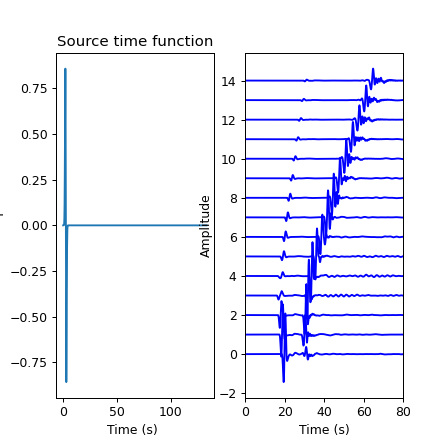

In [113]:
plt.show()